<a href="https://colab.research.google.com/github/RoyZhaoGA/DroughtForecastAI/blob/main/Normalized_Spatial_Temporal_GNNDroughtPrediction200k_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
processed_dataset_org = pd.read_csv("/content/drive/MyDrive/DroughtCastAI/Dataset/Processed_Datasets/CMIP6_processed_dataset_200km_version2_1_month_lag.csv")

In [ ]:
processed_dataset_org

,Unnamed: 0,Month,Lat,Lon,temperature_2m,temperature_2m_min,temperature_2m_max,dewpoint_temperature_2m,total_precipitation_sum,total_precipitation_min,...,EVI,next_month_tempreature,next_month_precipitation,spei01,spei03,datetime,year,month2,next_month_soil_moisture_am,next_month_spei01
0,287,201505,15.271,-17.068,297.249,291.684,304.108,292.141,0.000248,0.000000e+00,...,1132.95,303.650,3.938450e-06,-1.030740,-0.937773,2015-05-01,2015,5,0.148753,-1.983540
1,287,201506,15.271,-17.068,298.479,292.966,307.924,293.551,0.000030,0.000000e+00,...,1116.97,302.250,3.481040e-06,-1.983540,-1.747770,2015-06-01,2015,6,0.169415,-0.773948
2,287,201507,15.271,-17.068,300.038,296.358,304.813,295.583,0.039828,0.000000e+00,...,1368.95,302.435,1.429650e-05,-0.773948,-1.519480,2015-07-01,2015,7,0.229645,1.125420
3,287,201508,15.271,-17.068,300.277,297.167,304.959,297.178,0.201599,8.638150e-08,...,2475.59,303.790,6.708030e-05,1.125420,0.176900,2015-08-01,2015,8,0.226260,0.593335
4,287,201509,15.271,-17.068,300.453,296.962,304.370,297.498,0.118411,8.523460e-07,...,2849.36,304.714,1.539020e-06,0.593335,0.588032,2015-09-01,2015,9,0.155879,0.325884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83575,387,202304,11.678,51.204,299.834,294.269,306.253,293.895,0.005088,1.009060e-07,...,1300.87,303.895,1.717400e-06,1.432950,0.334410,2023-04-01,2023,4,0.147807,0.317675
83576,387,202305,11.678,51.204,301.408,294.354,307.231,295.266,0.019854,3.091570e-07,...,1210.34,305.717,4.468630e-07,0.317675,0.610513,2023-05-01,2023,5,0.147549,0.585810
83577,387,202306,11.678,51.204,302.933,296.843,309.328,292.453,0.000158,0.000000e+00,...,1144.27,305.315,3.380950e-08,0.585810,0.947582,2023-06-01,2023,6,0.146490,1.418990
83578,387,202307,11.678,51.204,304.032,299.200,309.950,290.167,0.000038,0.000000e+00,...,1043.21,303.643,4.085260e-06,1.418990,0.833237,2023-07-01,2023,7,0.148758,0.518092


In [ ]:
processed_dataset_org.describe()


,Unnamed: 0,Month,Lat,Lon,temperature_2m,temperature_2m_min,temperature_2m_max,dewpoint_temperature_2m,total_precipitation_sum,total_precipitation_min,...,NDVI,EVI,next_month_tempreature,next_month_precipitation,spei01,spei03,year,month2,next_month_soil_moisture_am,next_month_spei01
count,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,...,83580.000000,83580.000000,83580.000000,8.358000e+04,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000
mean,418.813735,201906.427614,6.426204,18.674333,297.649914,288.751947,307.368306,283.618993,0.053403,0.000054,...,3420.290769,2134.155208,298.576399,2.584283e-05,-0.646818,-0.761360,2018.999282,6.499402,0.151643,-0.646973
std,242.096341,242.792918,17.759911,15.790527,5.733555,6.671234,5.693900,8.848290,0.088575,0.000232,...,2345.066013,1406.945576,5.686335,4.198437e-05,1.343397,1.285446,2.432968,3.389895,0.126393,1.344868
min,0.000000,201505.000000,-33.238000,-17.068000,272.097000,258.898000,281.999000,259.118000,0.000016,0.000000,...,489.180000,326.296000,277.836000,0.000000e+00,-5.000000,-5.000000,2015.000000,1.000000,0.020000,-5.000000
25%,208.000000,201705.000000,-6.288000,8.085000,294.404000,284.604000,303.519750,276.173000,0.000221,0.000000,...,1138.105000,857.004500,295.590000,5.410485e-08,-1.500755,-1.608122,2017.000000,4.000000,0.050233,-1.499347
50%,419.000000,201906.000000,9.881000,20.661000,298.138000,290.355000,307.035500,284.262000,0.006267,0.000000,...,2827.910000,1692.095000,299.064000,3.700365e-06,-0.672251,-0.850191,2019.000000,6.000000,0.107151,-0.671430
75%,628.000000,202107.000000,20.661000,29.644000,301.243000,293.962000,311.563000,291.767250,0.076323,0.000001,...,5490.260000,3268.610000,302.221000,3.568545e-05,0.246571,0.077590,2021.000000,9.000000,0.219935,0.247549
max,837.000000,202308.000000,36.831000,51.204000,313.569000,302.760000,322.431000,298.408000,1.148110,0.006530,...,8742.230000,6458.600000,313.910000,3.350020e-04,5.000000,5.000000,2023.000000,12.000000,0.668410,5.000000


# **Feature Normalization** - Using Min Max Scaler

In [3]:
from sklearn import preprocessing

processed_dataset_normal = processed_dataset_org.copy()
processed_dataset_normal2=processed_dataset_normal[[ 'Lat', 'Lon', 'temperature_2m',
       'temperature_2m_min', 'temperature_2m_max', 'dewpoint_temperature_2m',
       'total_precipitation_sum', 'total_precipitation_min',
       'total_precipitation_max', 'u_component_of_wind_10m',
       'v_component_of_wind_10m', 'surface_net_solar_radiation_sum',
       'total_evaporation_sum', 'soil_moisture_am', 'soil_moisture_pm', 'NDVI',
       'EVI', 'next_month_tempreature', 'next_month_precipitation', 'spei01',
       'spei03', 'year', 'month2', 'next_month_soil_moisture_am',
       'next_month_spei01']]
x = processed_dataset_normal2.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalized_df= pd.DataFrame(x_scaled)

normalized_df.columns = ['Lat_nom', 'Lon_nom','temperature_2m',
       'temperature_2m_min', 'temperature_2m_max', 'dewpoint_temperature_2m',
       'total_precipitation_sum', 'total_precipitation_min',
       'total_precipitation_max', 'u_component_of_wind_10m',
       'v_component_of_wind_10m', 'surface_net_solar_radiation_sum',
       'total_evaporation_sum', 'soil_moisture_am', 'soil_moisture_pm', 'NDVI',
       'EVI', 'next_month_tempreature', 'next_month_precipitation', 'spei01',
       'spei03', 'year', 'month2', 'next_month_soil_moisture_am',
       'next_month_spei01']

horizontal_concat = pd.concat([processed_dataset_normal[['Month','Lat', 'Lon']],normalized_df, processed_dataset_normal[['datetime']]], axis=1)
#horizontal_concat2 = pd.concat([ processed_dataset_normal[['monrh']],horizontal_concat, axis=1)
# view normalized data
display(horizontal_concat)

NameError: name 'processed_dataset_org' is not defined

In [ ]:
processed_dataset=horizontal_concat

processed_dataset.describe()

,Month,Lat,Lon,Lat_nom,Lon_nom,temperature_2m,temperature_2m_min,temperature_2m_max,dewpoint_temperature_2m,total_precipitation_sum,...,NDVI,EVI,next_month_tempreature,next_month_precipitation,spei01,spei03,year,month2,next_month_soil_moisture_am,next_month_spei01
count,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,...,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000
mean,201906.427614,6.426204,18.674333,0.566073,0.523528,0.616149,0.680634,0.627456,0.623594,0.046500,...,0.355155,0.294809,0.574940,0.077142,0.435318,0.423864,0.499910,0.499946,0.203024,0.435303
std,242.792918,17.759911,15.790527,0.253463,0.231288,0.138251,0.152096,0.140827,0.225205,0.077150,...,0.284145,0.229432,0.157630,0.125326,0.134340,0.128545,0.304121,0.308172,0.194927,0.134487
min,201505.000000,-33.238000,-17.068000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,201705.000000,-6.288000,8.085000,0.384621,0.368423,0.537881,0.586065,0.532270,0.434080,0.000178,...,0.078629,0.086543,0.492155,0.000162,0.349924,0.339188,0.250000,0.272727,0.046626,0.350065
50%,201906.000000,9.881000,20.661000,0.615379,0.552628,0.627918,0.717181,0.619225,0.639959,0.005444,...,0.283378,0.222722,0.588457,0.011046,0.432775,0.414981,0.500000,0.454545,0.134407,0.432857
75%,202107.000000,20.661000,29.644000,0.769227,0.684204,0.702787,0.799416,0.731203,0.830981,0.066464,...,0.605967,0.479806,0.675972,0.106523,0.524657,0.507759,0.750000,0.727273,0.308346,0.524755
max,202308.000000,36.831000,51.204000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
display(processed_dataset)

,Month,Lat,Lon,Lat_nom,Lon_nom,temperature_2m,temperature_2m_min,temperature_2m_max,dewpoint_temperature_2m,total_precipitation_sum,...,EVI,next_month_tempreature,next_month_precipitation,spei01,spei03,year,month2,next_month_soil_moisture_am,next_month_spei01,datetime
0,201505,15.271,-17.068,0.692303,0.0,0.606481,0.747481,0.546819,0.840494,0.000202,...,0.131542,0.715585,0.011756,0.396926,0.406223,0.0,0.363636,0.198567,0.301646,2015-05-01
1,201506,15.271,-17.068,0.692303,0.0,0.636140,0.776709,0.641200,0.876381,0.000012,...,0.128936,0.676776,0.010391,0.301646,0.325223,0.0,0.454545,0.230433,0.422605,2015-06-01
2,201507,15.271,-17.068,0.692303,0.0,0.673732,0.854042,0.564256,0.928099,0.034677,...,0.170026,0.681904,0.042676,0.422605,0.348052,0.0,0.545455,0.323322,0.612542,2015-07-01
3,201508,15.271,-17.068,0.692303,0.0,0.679495,0.872486,0.567867,0.968694,0.175580,...,0.350487,0.719466,0.200239,0.612542,0.517690,0.0,0.636364,0.318101,0.559334,2015-08-01
4,201509,15.271,-17.068,0.692303,0.0,0.683738,0.867813,0.553299,0.976839,0.103123,...,0.411438,0.745080,0.004594,0.559334,0.558803,0.0,0.727273,0.209557,0.532588,2015-09-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83575,202304,11.678,51.204,0.641025,1.0,0.668813,0.806416,0.599871,0.885136,0.004417,...,0.158925,0.722376,0.005127,0.643295,0.533441,1.0,0.272727,0.197108,0.531767,2023-04-01
83576,202305,11.678,51.204,0.641025,1.0,0.706766,0.808353,0.624060,0.920031,0.017279,...,0.144162,0.772884,0.001334,0.531767,0.561051,1.0,0.363636,0.196710,0.558581,2023-05-01
83577,202306,11.678,51.204,0.641025,1.0,0.743538,0.865100,0.675925,0.848435,0.000123,...,0.133388,0.761740,0.000101,0.558581,0.594758,1.0,0.454545,0.195077,0.641899,2023-06-01
83578,202307,11.678,51.204,0.641025,1.0,0.770038,0.918836,0.691309,0.790252,0.000019,...,0.116908,0.715391,0.012195,0.641899,0.583324,1.0,0.545455,0.198575,0.551809,2023-07-01


In [1]:
processed_dataset.to_csv('/content/drive/MyDrive/DroughtCastAI/Dataset/Processed_Datasets/CMIP6_processed_dataset_200km_version2_1_month_lag_normalizedV1.csv', sep=',', encoding='utf-8', header='true')

NameError: name 'processed_dataset' is not defined

In [135]:
processed_dataset=pd.read_csv("/content/drive/MyDrive/DroughtCastAI/Dataset/Processed_Datasets/CMIP6_processed_dataset_200km_version2_1_month_lag_normalizedV1.csv")
processed_dataset.describe()

,Unnamed: 0,Month,Lat,Lon,Lat_nom,Lon_nom,temperature_2m,temperature_2m_min,temperature_2m_max,dewpoint_temperature_2m,...,NDVI,EVI,next_month_tempreature,next_month_precipitation,spei01,spei03,year,month2,next_month_soil_moisture_am,next_month_spei01
count,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,...,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000
mean,41789.500000,201906.427614,6.426204,18.674333,0.566073,0.523528,0.616149,0.680634,0.627456,0.623594,...,0.355155,0.294809,0.574940,0.077142,0.435318,0.423864,0.499910,0.499946,0.203024,0.435303
std,24127.612087,242.792918,17.759911,15.790527,0.253463,0.231288,0.138251,0.152096,0.140827,0.225205,...,0.284145,0.229432,0.157630,0.125326,0.134340,0.128545,0.304121,0.308172,0.194927,0.134487
min,0.000000,201505.000000,-33.238000,-17.068000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20894.750000,201705.000000,-6.288000,8.085000,0.384621,0.368423,0.537881,0.586065,0.532270,0.434080,...,0.078629,0.086543,0.492155,0.000162,0.349924,0.339188,0.250000,0.272727,0.046626,0.350065
50%,41789.500000,201906.000000,9.881000,20.661000,0.615379,0.552628,0.627918,0.717181,0.619225,0.639959,...,0.283378,0.222722,0.588457,0.011046,0.432775,0.414981,0.500000,0.454545,0.134407,0.432857
75%,62684.250000,202107.000000,20.661000,29.644000,0.769227,0.684204,0.702787,0.799416,0.731203,0.830981,...,0.605967,0.479806,0.675972,0.106523,0.524657,0.507759,0.750000,0.727273,0.308346,0.524755
max,83579.000000,202308.000000,36.831000,51.204000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [136]:
import networkx as nx
from geopy.distance import geodesic

In [137]:
def display_a_to_b_nodes(graph, a, b, attribute_name):
    # Extract nodes from index a to b
    nodes_subset = list(graph.nodes())[a:b]

    # Create a subgraph with these nodes
    subgraph = graph.subgraph(nodes_subset)

    # Create a dictionary for node labels based on the specified attribute
    node_labels = {node: subgraph.nodes[node].get(attribute_name, '') for node in subgraph.nodes()}

    # Draw the subgraph with the linear layout
    plt.figure(figsize=(15, 5))
    nx.draw(subgraph, with_labels=True, node_color="cyan", node_size=500, edge_color='black', linewidths=1, font_size=10, labels=node_labels)
    plt.show()

In [138]:
sort_processed_dataset = processed_dataset.sort_values(by=["Month",'Lat','Lon'])
sort_processed_dataset

,Unnamed: 0,Month,Lat,Lon,Lat_nom,Lon_nom,temperature_2m,temperature_2m_min,temperature_2m_max,dewpoint_temperature_2m,...,EVI,next_month_tempreature,next_month_precipitation,spei01,spei03,year,month2,next_month_soil_moisture_am,next_month_spei01,datetime
36896,36896,201505,-33.238,18.865,0.0,0.526321,0.398172,0.485135,0.527923,0.593484,...,0.204301,0.197233,0.106377,0.435383,0.357744,0.0,0.363636,0.356693,0.564221,2015-05-01
40496,40496,201505,-33.238,20.661,0.0,0.552628,0.349754,0.418038,0.437228,0.444897,...,0.120505,0.167129,0.051331,0.493988,0.428312,0.0,0.363636,0.289999,0.746059,2015-05-01
44196,44196,201505,-33.238,22.458,0.0,0.578949,0.375193,0.422256,0.457385,0.470960,...,0.133445,0.172479,0.068831,0.460426,0.480249,0.0,0.363636,0.334359,0.689636,2015-05-01
47996,47996,201505,-33.238,24.255,0.0,0.605270,0.389299,0.458894,0.511773,0.493153,...,0.184492,0.188169,0.071556,0.496584,0.604930,0.0,0.363636,0.280466,0.643318,2015-05-01
51696,51696,201505,-33.238,26.051,0.0,0.631577,0.398992,0.463682,0.522853,0.573683,...,0.407857,0.258191,0.101502,0.422760,0.559692,0.0,0.363636,0.332310,0.627903,2015-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16798,16798,202308,36.831,2.695,1.0,0.289474,0.667945,0.756691,0.643748,0.852634,...,0.171166,0.621888,0.130777,0.199253,0.271646,1.0,0.636364,0.124452,0.390657,2023-08-01
18598,18598,202308,36.831,4.492,1.0,0.315796,0.647545,0.728672,0.660986,0.788369,...,0.183406,0.610772,0.091340,0.238931,0.303782,1.0,0.636364,0.224663,0.322575,2023-08-01
20498,20498,202308,36.831,6.288,1.0,0.342102,0.653019,0.717706,0.701103,0.789488,...,0.221102,0.603232,0.081882,0.234256,0.384567,1.0,0.636364,0.213737,0.305495,2023-08-01
22398,22398,202308,36.831,8.085,1.0,0.368423,0.668234,0.745839,0.794890,0.796946,...,0.192887,0.609275,0.068997,0.350369,0.368890,1.0,0.636364,0.220538,0.282792,2023-08-01


In [139]:
sort_processed_dataset["row_index"] = sort_processed_dataset.index

In [140]:
sort_processed_dataset

,Unnamed: 0,Month,Lat,Lon,Lat_nom,Lon_nom,temperature_2m,temperature_2m_min,temperature_2m_max,dewpoint_temperature_2m,...,next_month_tempreature,next_month_precipitation,spei01,spei03,year,month2,next_month_soil_moisture_am,next_month_spei01,datetime,row_index
36896,36896,201505,-33.238,18.865,0.0,0.526321,0.398172,0.485135,0.527923,0.593484,...,0.197233,0.106377,0.435383,0.357744,0.0,0.363636,0.356693,0.564221,2015-05-01,36896
40496,40496,201505,-33.238,20.661,0.0,0.552628,0.349754,0.418038,0.437228,0.444897,...,0.167129,0.051331,0.493988,0.428312,0.0,0.363636,0.289999,0.746059,2015-05-01,40496
44196,44196,201505,-33.238,22.458,0.0,0.578949,0.375193,0.422256,0.457385,0.470960,...,0.172479,0.068831,0.460426,0.480249,0.0,0.363636,0.334359,0.689636,2015-05-01,44196
47996,47996,201505,-33.238,24.255,0.0,0.605270,0.389299,0.458894,0.511773,0.493153,...,0.188169,0.071556,0.496584,0.604930,0.0,0.363636,0.280466,0.643318,2015-05-01,47996
51696,51696,201505,-33.238,26.051,0.0,0.631577,0.398992,0.463682,0.522853,0.573683,...,0.258191,0.101502,0.422760,0.559692,0.0,0.363636,0.332310,0.627903,2015-05-01,51696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16798,16798,202308,36.831,2.695,1.0,0.289474,0.667945,0.756691,0.643748,0.852634,...,0.621888,0.130777,0.199253,0.271646,1.0,0.636364,0.124452,0.390657,2023-08-01,16798
18598,18598,202308,36.831,4.492,1.0,0.315796,0.647545,0.728672,0.660986,0.788369,...,0.610772,0.091340,0.238931,0.303782,1.0,0.636364,0.224663,0.322575,2023-08-01,18598
20498,20498,202308,36.831,6.288,1.0,0.342102,0.653019,0.717706,0.701103,0.789488,...,0.603232,0.081882,0.234256,0.384567,1.0,0.636364,0.213737,0.305495,2023-08-01,20498
22398,22398,202308,36.831,8.085,1.0,0.368423,0.668234,0.745839,0.794890,0.796946,...,0.609275,0.068997,0.350369,0.368890,1.0,0.636364,0.220538,0.282792,2023-08-01,22398


In [141]:
sort_processed_dataset.columns

Index(['Unnamed: 0', 'Month', 'Lat', 'Lon', 'Lat_nom', 'Lon_nom',
       'temperature_2m', 'temperature_2m_min', 'temperature_2m_max',
       'dewpoint_temperature_2m', 'total_precipitation_sum',
       'total_precipitation_min', 'total_precipitation_max',
       'u_component_of_wind_10m', 'v_component_of_wind_10m',
       'surface_net_solar_radiation_sum', 'total_evaporation_sum',
       'soil_moisture_am', 'soil_moisture_pm', 'NDVI', 'EVI',
       'next_month_tempreature', 'next_month_precipitation', 'spei01',
       'spei03', 'year', 'month2', 'next_month_soil_moisture_am',
       'next_month_spei01', 'datetime', 'row_index'],
      dtype='object')

In [142]:
def display_a_to_b_nodes2(graph, a, b, attribute_name):
    # Extract nodes from index a to b
    nodes_subset = list(graph.nodes())[a:b]
    print("node subset", nodes_subset)
    # Create a subgraph with these nodes
    subgraph = graph.subgraph(nodes_subset)

    # Create a dictionary for node labels based on the specified attribute
    node_labels = {node: subgraph.nodes[node].get(attribute_name, '') for node in subgraph.nodes()}

    # Draw the subgraph with the linear layout
    plt.figure(figsize=(15, 5))
    nx.draw(subgraph, with_labels=True, node_color="cyan", node_size=500, edge_color='black', linewidths=1, font_size=10, labels=node_labels)
    plt.show()

**Spatial-Temporal Graph**

In [143]:
Spatial_temporal_graph = nx.Graph()

In [144]:
# Add nodes with features
for index, row in sort_processed_dataset.iterrows():
    Spatial_temporal_graph.add_node(index, **row[["row_index","Month",'Lat', 'Lon',  'Lat_nom', 'Lon_nom','temperature_2m', 'temperature_2m_min',
                             'temperature_2m_max', 'dewpoint_temperature_2m', 'total_precipitation_sum',
                             'total_precipitation_min', 'total_precipitation_max', 'u_component_of_wind_10m',
                             'v_component_of_wind_10m', 'surface_net_solar_radiation_sum',
                             'total_evaporation_sum', 'soil_moisture_am', 'soil_moisture_pm', 'NDVI',
                             'EVI', 'next_month_tempreature', 'next_month_precipitation', 'year', 'month2', 'spei01', "next_month_soil_moisture_am", "next_month_spei01"]].to_dict())

print("finished creating node features")

finished creating node features


In [146]:
unique_list_of_months = list(set(sort_processed_dataset["Month"]))
unique_list_of_months.sort()
unique_list_of_months

[201505,
 201506,
 201507,
 201508,
 201509,
 201510,
 201511,
 201512,
 201601,
 201602,
 201603,
 201604,
 201605,
 201606,
 201607,
 201608,
 201609,
 201610,
 201611,
 201612,
 201701,
 201702,
 201703,
 201704,
 201705,
 201706,
 201707,
 201708,
 201709,
 201710,
 201711,
 201712,
 201801,
 201802,
 201803,
 201804,
 201805,
 201806,
 201807,
 201808,
 201809,
 201810,
 201811,
 201812,
 201901,
 201902,
 201903,
 201904,
 201905,
 201906,
 201907,
 201908,
 201909,
 201910,
 201911,
 201912,
 202001,
 202002,
 202003,
 202004,
 202005,
 202006,
 202007,
 202008,
 202009,
 202010,
 202011,
 202012,
 202101,
 202102,
 202103,
 202104,
 202105,
 202106,
 202107,
 202108,
 202109,
 202110,
 202111,
 202112,
 202201,
 202202,
 202203,
 202204,
 202205,
 202206,
 202207,
 202208,
 202209,
 202210,
 202211,
 202212,
 202301,
 202302,
 202303,
 202304,
 202305,
 202306,
 202307,
 202308]

**Distance-Based Spatial Graph**

In [147]:
from scipy.spatial import KDTree
total_index=0
diff=0.1

for month in unique_list_of_months:
    dataset_subset = sort_processed_dataset[sort_processed_dataset["Month"] == month]
    print("\n!!!!!!!!!!CURRENT MONTH!",month)
    # Create a KDTree for efficient spatial queries
    tree = KDTree(dataset_subset[['Lat', 'Lon']])

    # Iterate through each row in the dataset
    for i, row in dataset_subset.iterrows():
        # Query the tree for points within 3 units
        indices = tree.query_ball_point([row['Lat'], row['Lon']], 3)
        i_Spei=row['spei01']
        i_Spei_a=row['next_month_spei01']
        print("Current row I ",i," Lat and Lon ",row['Lat'],row['Lon']," with SPEI ", i_Spei," with avg SPEI ", i_Spei_a)
        # Add edges to the graph
        for j in indices:
            j_row_index = sort_processed_dataset.iloc[total_index + j]["row_index"]
            j_month=sort_processed_dataset.iloc[total_index + j]["Month"]
            j_Lat=sort_processed_dataset.iloc[total_index + j]["Lat"]
            j_Lon=sort_processed_dataset.iloc[total_index + j]["Lon"]
            j_Spei=sort_processed_dataset.iloc[total_index + j]["spei01"]
            j_Spei_a=sort_processed_dataset.iloc[total_index + j]["next_month_spei01"]
            speiDiff=abs(i_Spei - j_Spei)
            speiDiff_a=abs(i_Spei_a - j_Spei_a)
            print("Adjacent row J ", j_row_index, "of Month" , j_month, " Lat and Lon", j_Lat,j_Lon, " with SPEI ", j_Spei," with avg SPEI ", j_Spei_a)
            if i != j_row_index:  # Avoid adding self-loops
                if  (speiDiff < diff) and (speiDiff_a < diff) :
                  Spatial_temporal_graph.add_edge(i, j_row_index)
                  print("Edge Added: "+str(i)+", "+str(j_row_index))

    total_index += len(dataset_subset)

    print("nodes processed: " + str(total_index))

Streaming output truncated to the last 5000 lines.
Adjacent row J  78282 of Month 202308  Lat and Lon 11.678 40.424  with SPEI  0.20593  with avg SPEI  0.101908
Adjacent row J  78382 of Month 202308  Lat and Lon 13.475 40.424  with SPEI  0.1613379999999999  with avg SPEI  0.0
Adjacent row J  78182 of Month 202308  Lat and Lon 9.881 40.424  with SPEI  0.4314984  with avg SPEI  0.4214504
Adjacent row J  79182 of Month 202308  Lat and Lon 9.881 42.221  with SPEI  0.237263  with avg SPEI  0.2714799999999999
Adjacent row J  79281 of Month 202308  Lat and Lon 11.678 42.221  with SPEI  4.499999999996174e-05  with avg SPEI  0.0002839999999999
Adjacent row J  79380 of Month 202308  Lat and Lon 13.475 42.221  with SPEI  0.0  with avg SPEI  0.0
Edge Added: 79281, 79380
Adjacent row J  80480 of Month 202308  Lat and Lon 9.881 44.017  with SPEI  0.0410639999999999  with avg SPEI  0.014351
Edge Added: 79281, 80480
Current row I  83379  Lat and Lon  11.678 49.407  with SPEI  0.94484  with avg SPEI  0

In [148]:
import networkx as nx

# Load the graph
Graph =  Spatial_temporal_graph

# Print summary information about the graph
print("Number of nodes:", Graph.number_of_nodes())
print("Number of edges:", Graph.number_of_edges())
print("Average degree:", sum(dict(Graph.degree()).values()) / Graph.number_of_nodes())

# For directed graphs, you might also want to print in-degree and out-degree
if Graph.is_directed():
    print("Average in-degree:", sum(dict(Graph.in_degree()).values()) / Graph.number_of_nodes())
    print("Average out-degree:", sum(dict(Graph.out_degree()).values()) / Graph.number_of_nodes())

# Additional information can include:
# - Checking if the graph is connected (for undirected graphs)
# - The number of connected components
# - Graph density
if nx.is_connected(Graph):
    print("The graph is connected")
else:
    print("The graph is not connected")
    print("Number of connected components:", nx.number_connected_components(Graph))

print("Graph density:", nx.density(Graph))

Number of nodes: 83580
Number of edges: 216057
Average degree: 5.170064608758076
The graph is not connected
Number of connected components: 2951
Graph density: 6.185841669268687e-05


In [149]:
def display_nodes(graph, df, attribute_name):
    # Extract nodes from index a to b
    nodes_subset = list()
    for  columnData  in df["row_index"]:
      row_index=columnData
     # node = graph.nodes[columnData]
      nodes_subset.append(row_index)
      #print('NODE : ', node )

    print("node subset", nodes_subset)
    # Create a subgraph with these nodes
    subgraph = graph.subgraph(nodes_subset)
    print('subgraph : ', subgraph )
    # Create a dictionary for node labels based on the specified attribute
    node_labels = {node: subgraph.nodes[node].get(attribute_name, '') for node in subgraph.nodes()}
    print('lable : ', node_labels )
    # Draw the subgraph with the linear layout
    plt.figure(figsize=(15, 5))
    nx.draw(subgraph, with_labels=True, node_color="cyan", node_size=100, edge_color='red', linewidths=1, font_size=5, labels=node_labels)
    plt.show()

In [150]:
dfym=sort_processed_dataset[(sort_processed_dataset["Month"] == 201505) ]
#print(dfym)
maxrow = dfym["row_index"].max()
minrow = dfym["row_index"].min()
dfym_row=dfym.sort_values(by=['row_index'], ascending=True)
print(dfym_row["row_index"])

0            0
100        100
200        200
300        300
400        400
         ...  
83080    83080
83180    83180
83280    83280
83380    83380
83480    83480
Name: row_index, Length: 836, dtype: int64


node subset [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900, 5000, 5100, 5200, 5300, 5400, 5500, 5600, 5700, 5800, 5900, 6000, 6100, 6200, 6300, 6400, 6500, 6600, 6700, 6800, 6900, 7000, 7100, 7200, 7300, 7400, 7500, 7600, 7700, 7800, 7900, 8000, 8100, 8200, 8300, 8400, 8500, 8600, 8700, 8800, 8900, 9000, 9100, 9200, 9300, 9400, 9500, 9600, 9700, 9800, 9900, 9999, 10099, 10199, 10299, 10399, 10499, 10599, 10699, 10799, 10899, 10999, 11099, 11199, 11299, 11399, 11499, 11599, 11699, 11799, 11899, 11999, 12099, 12199, 12299, 12399, 12499, 12599, 12699, 12799, 12899, 12999, 13099, 13199, 13299, 13399, 13499, 13599, 13699, 13799, 13899, 13999, 14099, 14199, 14299, 14399, 14499, 14599, 14699, 14799, 14899, 14999, 15099, 15199, 15299, 15399, 15499, 15599, 1

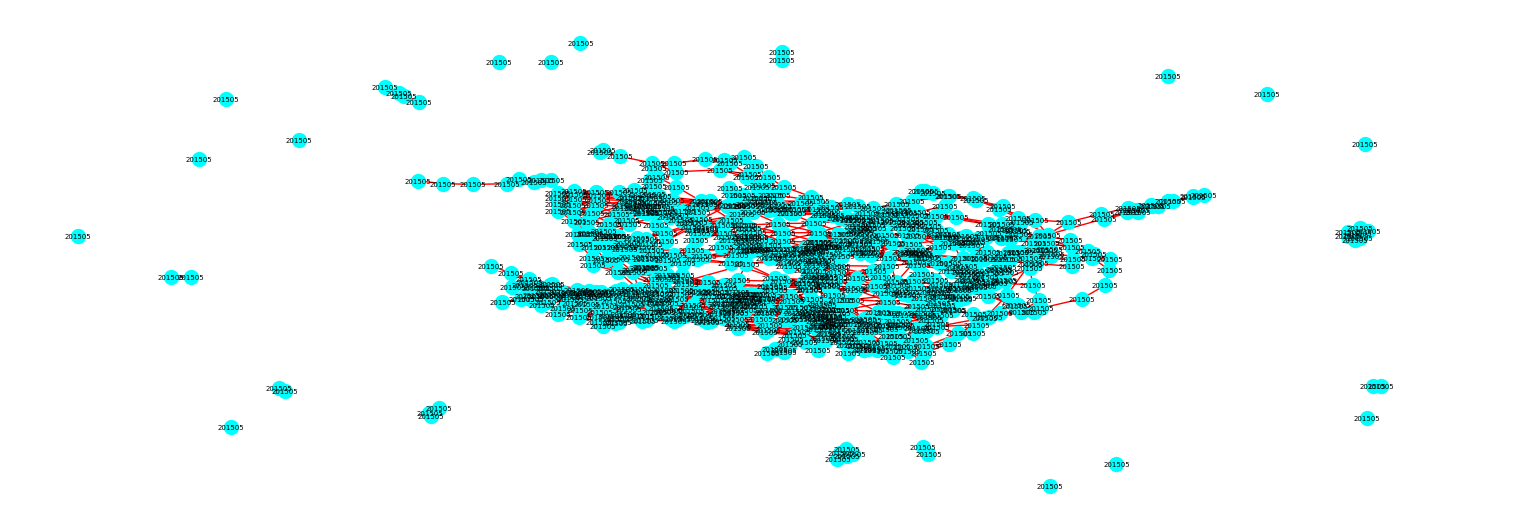

In [159]:
display_nodes(Spatial_temporal_graph, dfym_row, "Month")

      lat    lon
0  35.034  6.288
1  35.034  8.085
2  36.831  6.288
3  36.831  8.085
4  36.831  9.881
5  35.034  9.881


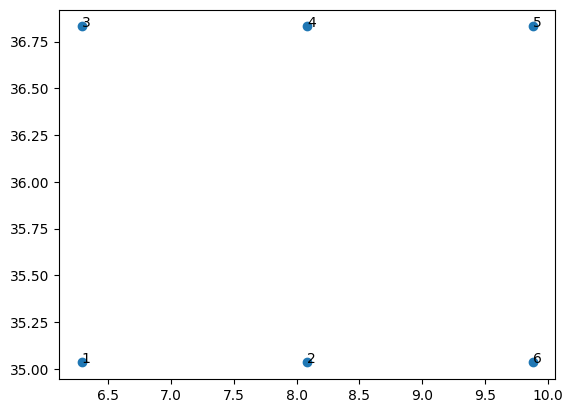

In [152]:
lat = [35.034 , 35.034 , 36.831 , 36.831, 36.831 , 35.034  ]
lon = [6.288, 8.085, 6.288, 8.085,9.881,9.881]
n=[1,2,3,4,5,6]

# dictionary of lists
dict = {'lat': lat, 'lon': lon}

df = pd.DataFrame(dict)

print(df)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(x=df['lon'], y=df['lat'])

for i, txt in enumerate(n):
    ax.annotate(txt, (lon[i], lat[i]))
plt.show()

In [ ]:


def create_edge_list(graph, df_nodes):
    """
    Create a list of edge connections based on the graph and a DataFrame of nodes.

    :param graph: A NetworkX graph object.
    :param df_nodes: A DataFrame containing node information, indexed by node identifiers.
    :return: A list of tuples, where each tuple represents an edge (node1_index, node2_index).
    """
    edge_list = []
    for edge in graph.edges():
        node1, node2 = edge
        # Check if both nodes are in the DataFrame
        if node1 in df_nodes.index and node2 in df_nodes.index:
            node1_index = df_nodes.index.get_loc(node1)
            node2_index = df_nodes.index.get_loc(node2)
            edge_list.append((node1_index, node2_index))

    return edge_list

# Example usage
# Assuming you have a graph 'G' and a DataFrame 'df_nodes'
# G = nx.Graph()  # Or however your graph is created
# df_nodes = pd.DataFrame(...)  # Your DataFrame of nodes

# connections = create_edge_list(G, df_nodes)


In [160]:
def display_nodes_map(graph, df, attribute_name, degree):
    # Extract nodes from index a to b
    nodes_subset = list()
    for  columnData  in df["row_index"]:
      row_index=columnData
     # node = graph.nodes[columnData]
      nodes_subset.append(row_index)
      #print('NODE : ', node )

    print("node subset", nodes_subset)
    # Create a subgraph with these nodes
    subgraph = graph.subgraph(nodes_subset)
    print('subgraph : ', subgraph )
    # Create a dictionary for node labels based on the specified attribute
    node_labels = {node: subgraph.nodes[node].get(attribute_name, '') for node in subgraph.nodes()}

    node_lat = [subgraph.nodes[node].get("Lat", '') for node in subgraph.nodes() if subgraph.degree(node) == degree]
    node_lon = [subgraph.nodes[node].get("Lon", '') for node in subgraph.nodes() if subgraph.degree(node) == degree]

    dict = {'lat': node_lat, 'lon': node_lon}

    df = pd.DataFrame(dict)
    print('label : ', node_labels )
    print('Lat : ', node_lat )
    print('Lon : ', node_lon )
    # Draw the subgraph with the linear layout
    plt.figure(figsize=(15, 5))
    nx.draw(subgraph, with_labels=True, node_color="cyan", node_size=100, edge_color='red', linewidths=1, font_size=5, labels=node_labels)
    plt.show()
    return df

In [161]:
def display_nodes_map_gt(graph, df, attribute_name, degree):
    # Extract nodes from index a to b
    nodes_subset = list()
    for  columnData  in df["row_index"]:
      row_index=columnData
     # node = graph.nodes[columnData]
      nodes_subset.append(row_index)
      #print('NODE : ', node )

    print("node subset", nodes_subset)
    # Create a subgraph with these nodes
    subgraph = graph.subgraph(nodes_subset)
    print('subgraph : ', subgraph )
    # Create a dictionary for node labels based on the specified attribute
    node_labels = {node: subgraph.nodes[node].get(attribute_name, '') for node in subgraph.nodes()}

    node_lat = [subgraph.nodes[node].get("Lat", '') for node in subgraph.nodes() if subgraph.degree(node) > degree]
    node_lon = [subgraph.nodes[node].get("Lon", '') for node in subgraph.nodes() if subgraph.degree(node) > degree]

    dict = {'lat': node_lat, 'lon': node_lon}

    df = pd.DataFrame(dict)
    print('label : ', node_labels )
    print('Lat : ', node_lat )
    print('Lon : ', node_lon )
    # Draw the subgraph with the linear layout
    plt.figure(figsize=(15, 5))
    nx.draw(subgraph, with_labels=True, node_color="cyan", node_size=100, edge_color='red', linewidths=1, font_size=5, labels=node_labels)
    plt.show()
    return df

node subset [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900, 5000, 5100, 5200, 5300, 5400, 5500, 5600, 5700, 5800, 5900, 6000, 6100, 6200, 6300, 6400, 6500, 6600, 6700, 6800, 6900, 7000, 7100, 7200, 7300, 7400, 7500, 7600, 7700, 7800, 7900, 8000, 8100, 8200, 8300, 8400, 8500, 8600, 8700, 8800, 8900, 9000, 9100, 9200, 9300, 9400, 9500, 9600, 9700, 9800, 9900, 9999, 10099, 10199, 10299, 10399, 10499, 10599, 10699, 10799, 10899, 10999, 11099, 11199, 11299, 11399, 11499, 11599, 11699, 11799, 11899, 11999, 12099, 12199, 12299, 12399, 12499, 12599, 12699, 12799, 12899, 12999, 13099, 13199, 13299, 13399, 13499, 13599, 13699, 13799, 13899, 13999, 14099, 14199, 14299, 14399, 14499, 14599, 14699, 14799, 14899, 14999, 15099, 15199, 15299, 15399, 15499, 15599, 1

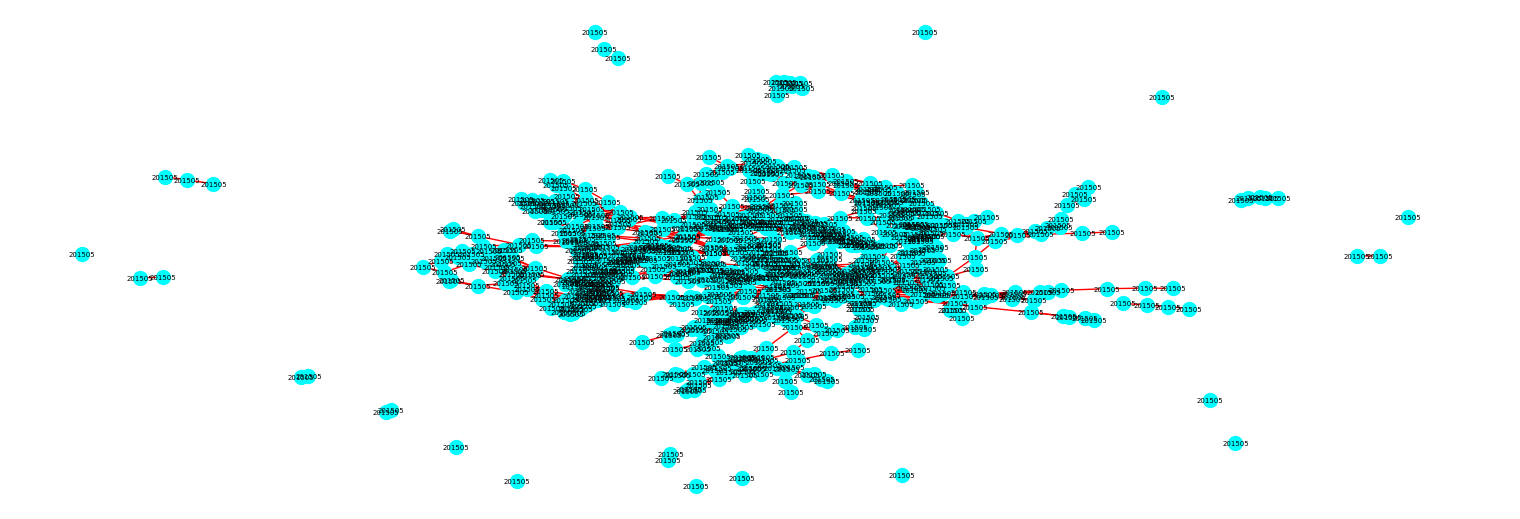

In [162]:
df0=display_nodes_map(Spatial_temporal_graph, dfym_row, "Month",0)

node subset [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900, 5000, 5100, 5200, 5300, 5400, 5500, 5600, 5700, 5800, 5900, 6000, 6100, 6200, 6300, 6400, 6500, 6600, 6700, 6800, 6900, 7000, 7100, 7200, 7300, 7400, 7500, 7600, 7700, 7800, 7900, 8000, 8100, 8200, 8300, 8400, 8500, 8600, 8700, 8800, 8900, 9000, 9100, 9200, 9300, 9400, 9500, 9600, 9700, 9800, 9900, 9999, 10099, 10199, 10299, 10399, 10499, 10599, 10699, 10799, 10899, 10999, 11099, 11199, 11299, 11399, 11499, 11599, 11699, 11799, 11899, 11999, 12099, 12199, 12299, 12399, 12499, 12599, 12699, 12799, 12899, 12999, 13099, 13199, 13299, 13399, 13499, 13599, 13699, 13799, 13899, 13999, 14099, 14199, 14299, 14399, 14499, 14599, 14699, 14799, 14899, 14999, 15099, 15199, 15299, 15399, 15499, 15599, 1

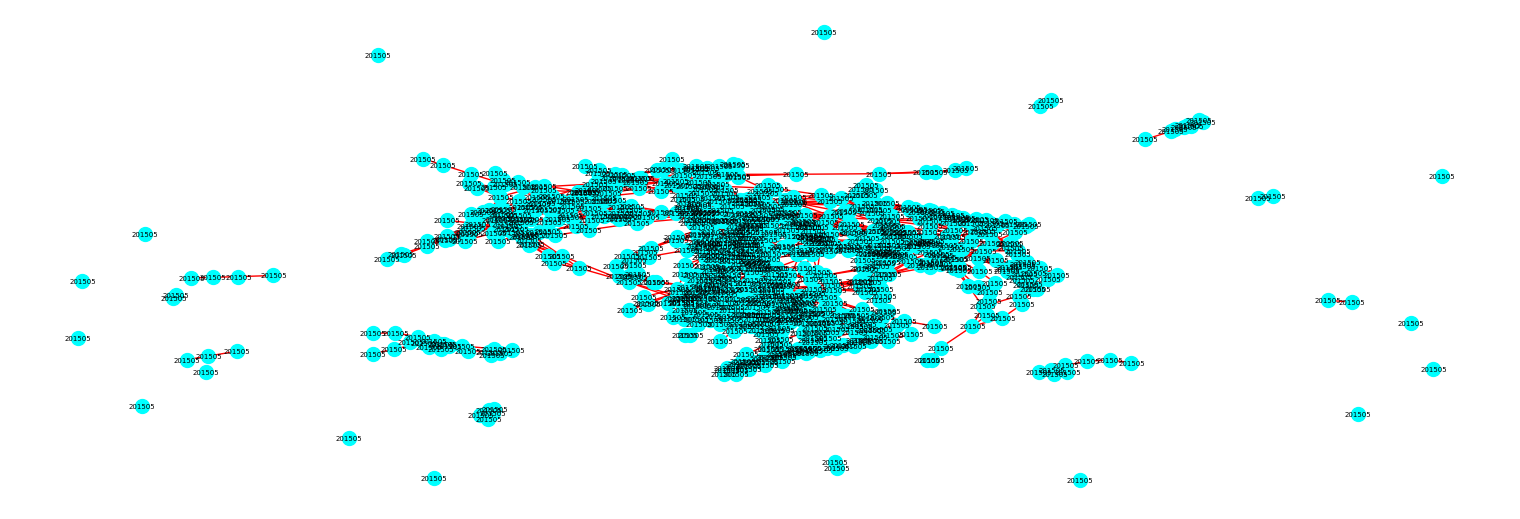

In [163]:
df1=display_nodes_map(Spatial_temporal_graph, dfym_row, "Month",1)

node subset [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900, 5000, 5100, 5200, 5300, 5400, 5500, 5600, 5700, 5800, 5900, 6000, 6100, 6200, 6300, 6400, 6500, 6600, 6700, 6800, 6900, 7000, 7100, 7200, 7300, 7400, 7500, 7600, 7700, 7800, 7900, 8000, 8100, 8200, 8300, 8400, 8500, 8600, 8700, 8800, 8900, 9000, 9100, 9200, 9300, 9400, 9500, 9600, 9700, 9800, 9900, 9999, 10099, 10199, 10299, 10399, 10499, 10599, 10699, 10799, 10899, 10999, 11099, 11199, 11299, 11399, 11499, 11599, 11699, 11799, 11899, 11999, 12099, 12199, 12299, 12399, 12499, 12599, 12699, 12799, 12899, 12999, 13099, 13199, 13299, 13399, 13499, 13599, 13699, 13799, 13899, 13999, 14099, 14199, 14299, 14399, 14499, 14599, 14699, 14799, 14899, 14999, 15099, 15199, 15299, 15399, 15499, 15599, 1

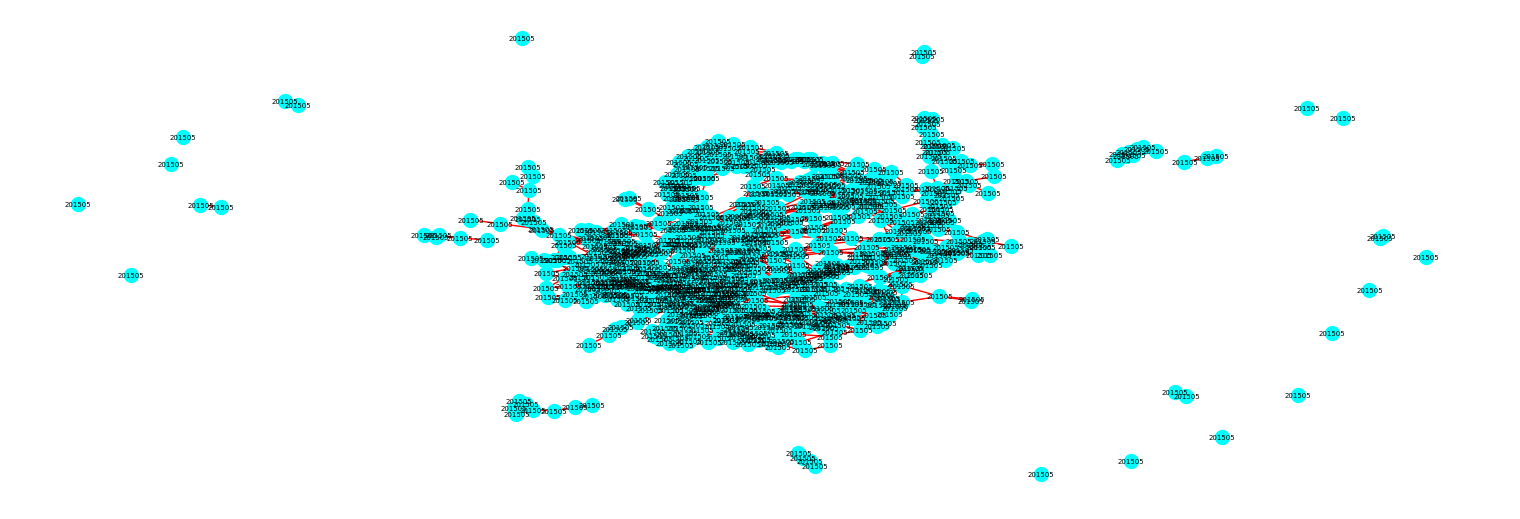

In [164]:
df2=display_nodes_map(Spatial_temporal_graph, dfym_row, "Month",2)

node subset [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900, 5000, 5100, 5200, 5300, 5400, 5500, 5600, 5700, 5800, 5900, 6000, 6100, 6200, 6300, 6400, 6500, 6600, 6700, 6800, 6900, 7000, 7100, 7200, 7300, 7400, 7500, 7600, 7700, 7800, 7900, 8000, 8100, 8200, 8300, 8400, 8500, 8600, 8700, 8800, 8900, 9000, 9100, 9200, 9300, 9400, 9500, 9600, 9700, 9800, 9900, 9999, 10099, 10199, 10299, 10399, 10499, 10599, 10699, 10799, 10899, 10999, 11099, 11199, 11299, 11399, 11499, 11599, 11699, 11799, 11899, 11999, 12099, 12199, 12299, 12399, 12499, 12599, 12699, 12799, 12899, 12999, 13099, 13199, 13299, 13399, 13499, 13599, 13699, 13799, 13899, 13999, 14099, 14199, 14299, 14399, 14499, 14599, 14699, 14799, 14899, 14999, 15099, 15199, 15299, 15399, 15499, 15599, 1

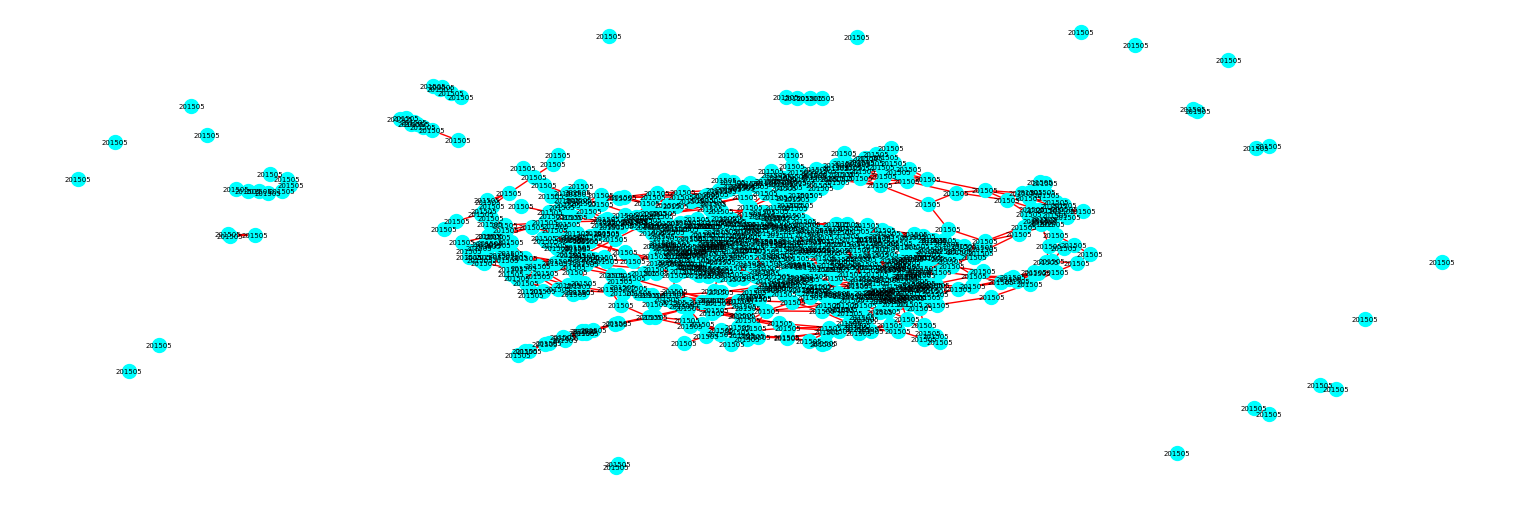

In [165]:
df3=display_nodes_map(Spatial_temporal_graph, dfym_row, "Month",3)

node subset [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900, 5000, 5100, 5200, 5300, 5400, 5500, 5600, 5700, 5800, 5900, 6000, 6100, 6200, 6300, 6400, 6500, 6600, 6700, 6800, 6900, 7000, 7100, 7200, 7300, 7400, 7500, 7600, 7700, 7800, 7900, 8000, 8100, 8200, 8300, 8400, 8500, 8600, 8700, 8800, 8900, 9000, 9100, 9200, 9300, 9400, 9500, 9600, 9700, 9800, 9900, 9999, 10099, 10199, 10299, 10399, 10499, 10599, 10699, 10799, 10899, 10999, 11099, 11199, 11299, 11399, 11499, 11599, 11699, 11799, 11899, 11999, 12099, 12199, 12299, 12399, 12499, 12599, 12699, 12799, 12899, 12999, 13099, 13199, 13299, 13399, 13499, 13599, 13699, 13799, 13899, 13999, 14099, 14199, 14299, 14399, 14499, 14599, 14699, 14799, 14899, 14999, 15099, 15199, 15299, 15399, 15499, 15599, 1

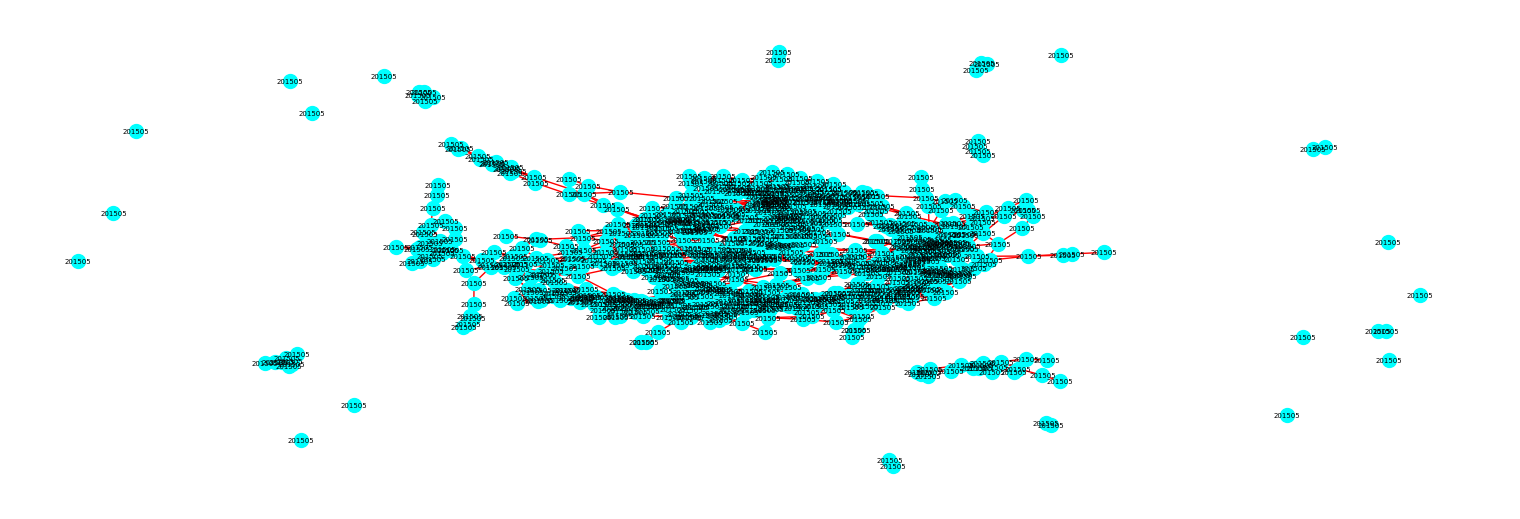

In [166]:
df4=display_nodes_map(Spatial_temporal_graph, dfym_row, "Month",4)

node subset [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900, 5000, 5100, 5200, 5300, 5400, 5500, 5600, 5700, 5800, 5900, 6000, 6100, 6200, 6300, 6400, 6500, 6600, 6700, 6800, 6900, 7000, 7100, 7200, 7300, 7400, 7500, 7600, 7700, 7800, 7900, 8000, 8100, 8200, 8300, 8400, 8500, 8600, 8700, 8800, 8900, 9000, 9100, 9200, 9300, 9400, 9500, 9600, 9700, 9800, 9900, 9999, 10099, 10199, 10299, 10399, 10499, 10599, 10699, 10799, 10899, 10999, 11099, 11199, 11299, 11399, 11499, 11599, 11699, 11799, 11899, 11999, 12099, 12199, 12299, 12399, 12499, 12599, 12699, 12799, 12899, 12999, 13099, 13199, 13299, 13399, 13499, 13599, 13699, 13799, 13899, 13999, 14099, 14199, 14299, 14399, 14499, 14599, 14699, 14799, 14899, 14999, 15099, 15199, 15299, 15399, 15499, 15599, 1

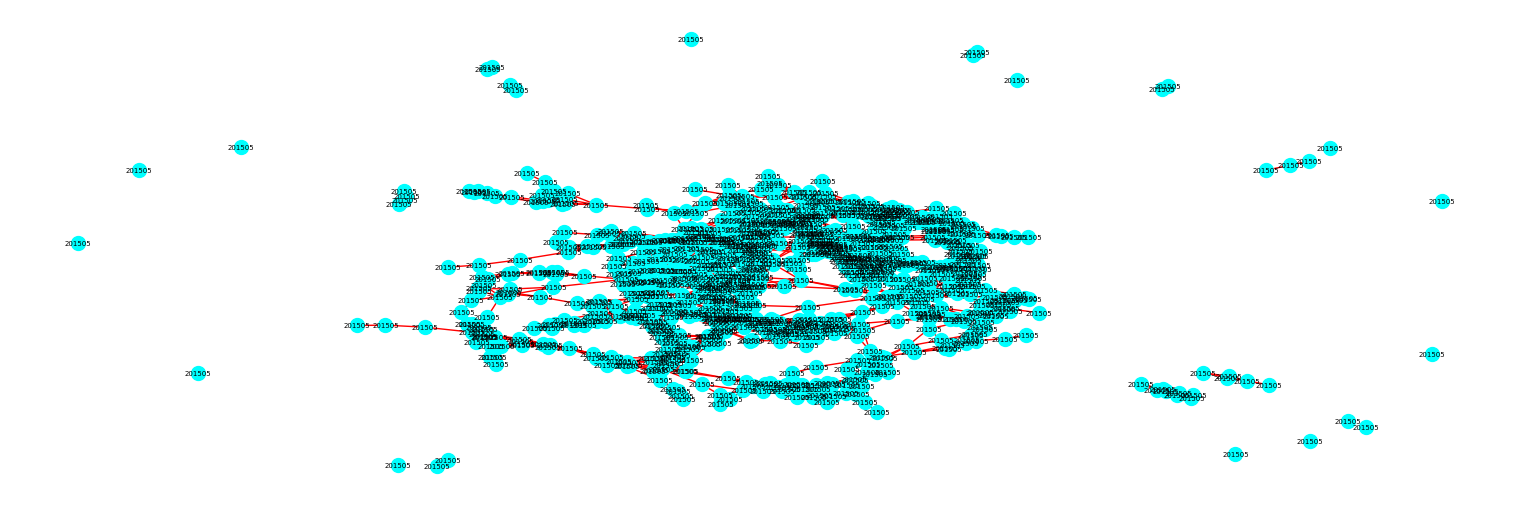

In [167]:
df5=display_nodes_map(Spatial_temporal_graph, dfym_row, "Month",5)

node subset [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900, 5000, 5100, 5200, 5300, 5400, 5500, 5600, 5700, 5800, 5900, 6000, 6100, 6200, 6300, 6400, 6500, 6600, 6700, 6800, 6900, 7000, 7100, 7200, 7300, 7400, 7500, 7600, 7700, 7800, 7900, 8000, 8100, 8200, 8300, 8400, 8500, 8600, 8700, 8800, 8900, 9000, 9100, 9200, 9300, 9400, 9500, 9600, 9700, 9800, 9900, 9999, 10099, 10199, 10299, 10399, 10499, 10599, 10699, 10799, 10899, 10999, 11099, 11199, 11299, 11399, 11499, 11599, 11699, 11799, 11899, 11999, 12099, 12199, 12299, 12399, 12499, 12599, 12699, 12799, 12899, 12999, 13099, 13199, 13299, 13399, 13499, 13599, 13699, 13799, 13899, 13999, 14099, 14199, 14299, 14399, 14499, 14599, 14699, 14799, 14899, 14999, 15099, 15199, 15299, 15399, 15499, 15599, 1

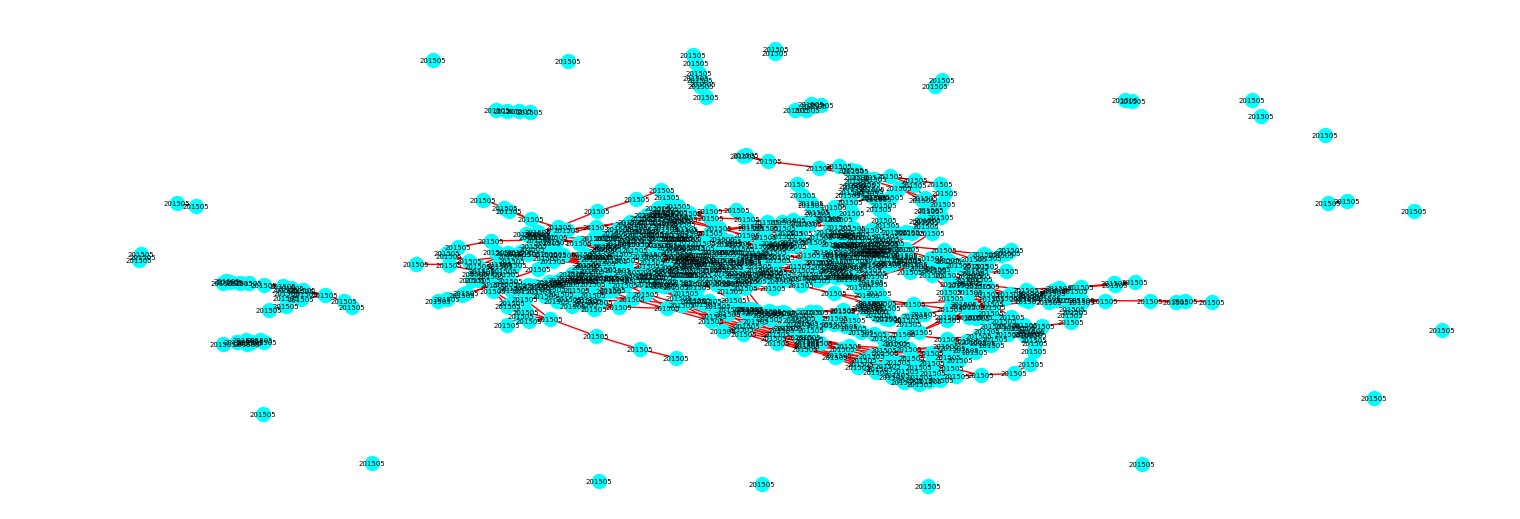

In [168]:
df6=display_nodes_map(Spatial_temporal_graph, dfym_row, "Month",6)

node subset [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900, 5000, 5100, 5200, 5300, 5400, 5500, 5600, 5700, 5800, 5900, 6000, 6100, 6200, 6300, 6400, 6500, 6600, 6700, 6800, 6900, 7000, 7100, 7200, 7300, 7400, 7500, 7600, 7700, 7800, 7900, 8000, 8100, 8200, 8300, 8400, 8500, 8600, 8700, 8800, 8900, 9000, 9100, 9200, 9300, 9400, 9500, 9600, 9700, 9800, 9900, 9999, 10099, 10199, 10299, 10399, 10499, 10599, 10699, 10799, 10899, 10999, 11099, 11199, 11299, 11399, 11499, 11599, 11699, 11799, 11899, 11999, 12099, 12199, 12299, 12399, 12499, 12599, 12699, 12799, 12899, 12999, 13099, 13199, 13299, 13399, 13499, 13599, 13699, 13799, 13899, 13999, 14099, 14199, 14299, 14399, 14499, 14599, 14699, 14799, 14899, 14999, 15099, 15199, 15299, 15399, 15499, 15599, 1

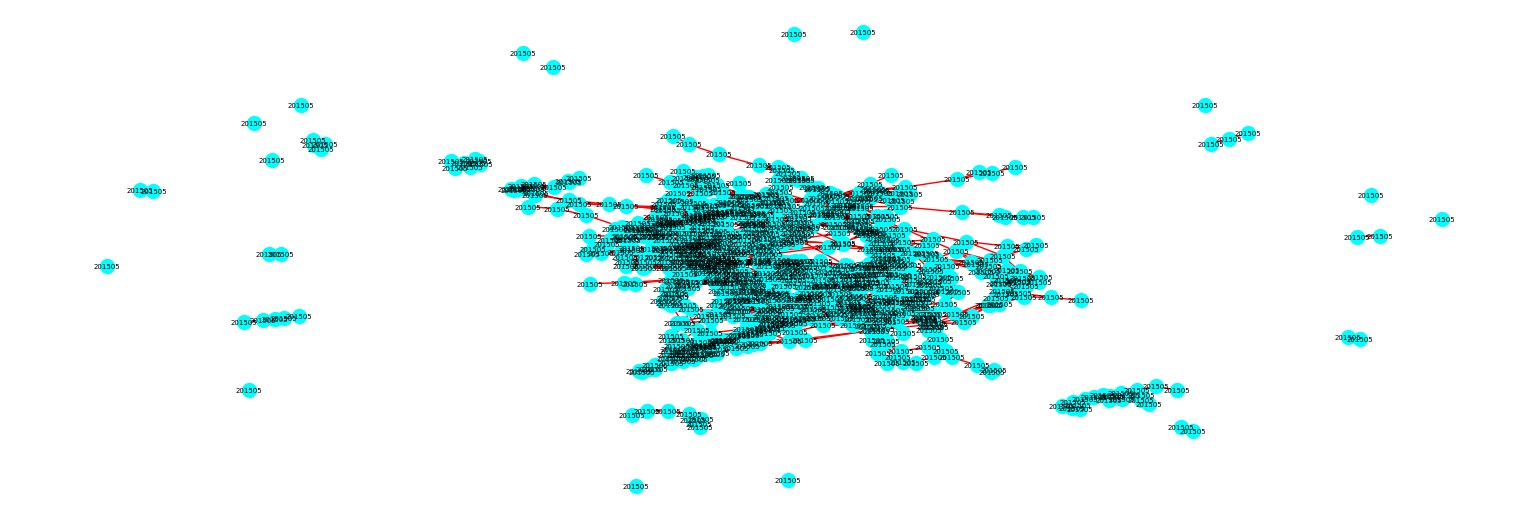

In [169]:
dfh=display_nodes_map_gt(Spatial_temporal_graph, dfym_row, "Month",6)

<ipython-input-171-a5cbe92c2a69>:36: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


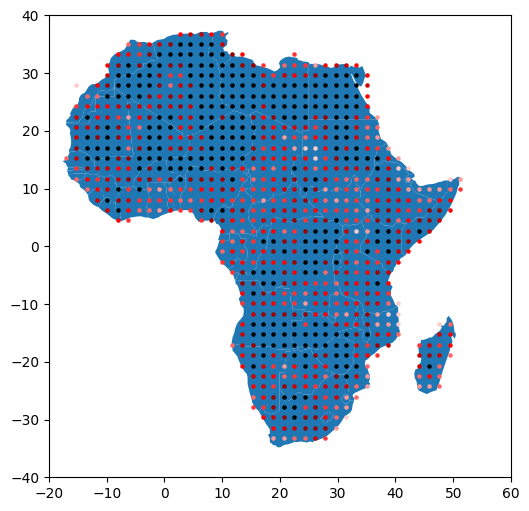

In [171]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame



geometry0 = [Point(xy) for xy in zip(df0['lon'], df0['lat'])]
gdf0 = GeoDataFrame(df0, geometry=geometry0)

geometry1 = [Point(xy) for xy in zip(df1['lon'], df1['lat'])]
gdf1 = GeoDataFrame(df1, geometry=geometry1)

geometry2 = [Point(xy) for xy in zip(df2['lon'], df2['lat'])]
gdf2 = GeoDataFrame(df2, geometry=geometry2)

geometry3 = [Point(xy) for xy in zip(df3['lon'], df3['lat'])]
gdf3 = GeoDataFrame(df3, geometry=geometry3)

geometry4 = [Point(xy) for xy in zip(df4['lon'], df4['lat'])]
gdf4 = GeoDataFrame(df4, geometry=geometry4)

geometry5 = [Point(xy) for xy in zip(df5['lon'], df5['lat'])]
gdf5 = GeoDataFrame(df5, geometry=geometry5)

geometry6 = [Point(xy) for xy in zip(df6['lon'], df6['lat'])]
gdf6 = GeoDataFrame(df6, geometry=geometry6)

geometryh = [Point(xy) for xy in zip(dfh['lon'], dfh['lat'])]
gdfh = GeoDataFrame(dfh, geometry=geometryh)

#this is a simple map that goes with geopandas
import geopandas as gpd
import matplotlib.pyplot as plt

# Load world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter for only African countries
africa = world[world['continent'] == 'Africa']

# Create a single plot
fig, ax = plt.subplots(figsize=(10, 6))
africa.plot(ax=ax)

# Shades of red, from light to dark
red_shades = ['#ffcccc', '#ff9999', '#ff6666', '#ff3333', '#ff0000', '#cc0000', '#990000']

# Plot each GeoDataFrame on the same axis, focusing on Africa, with shades of red
gdf0.plot(ax=ax, marker='o', color=red_shades[0], markersize=5)
gdf1.plot(ax=ax, marker='o', color=red_shades[1], markersize=5)
gdf2.plot(ax=ax, marker='o', color=red_shades[2], markersize=5)
gdf3.plot(ax=ax, marker='o', color=red_shades[3], markersize=5)
gdf4.plot(ax=ax, marker='o', color=red_shades[4], markersize=5)
gdf5.plot(ax=ax, marker='o', color=red_shades[5], markersize=5)
gdf6.plot(ax=ax, marker='o', color=red_shades[6], markersize=5)
# Assuming gdfh exists and should also be plotted
gdfh.plot(ax=ax, marker='o', color='black', markersize=5)  # Keeping black for gdfh as per your original code

# Adjust the plot to focus on Africa
ax.set_xlim([-20, 60])  # Longitude bounds for Africa
ax.set_ylim([-40, 40])  # Latitude bounds for Africa

# Show the plot
plt.show()


<ipython-input-173-57cf8a7216b6>:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


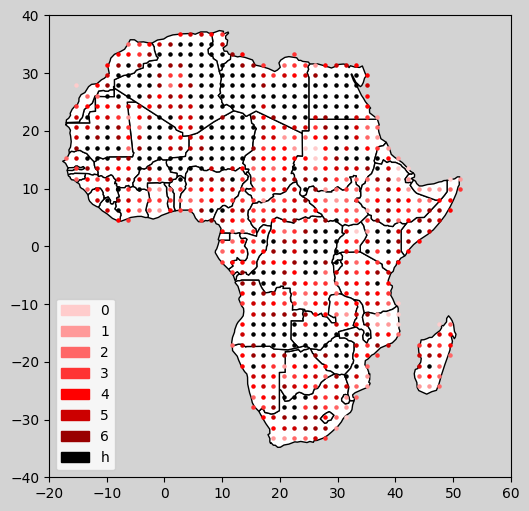

In [173]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Load world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter for only African countries
africa = world[world['continent'] == 'Africa']

# Create a single plot
fig, ax = plt.subplots(figsize=(10, 6))

# Set the background color
fig.patch.set_facecolor('lightgrey')
ax.set_facecolor('lightgrey')

# Plot Africa with a neutral color
africa.plot(ax=ax, color='white', edgecolor='black')

# Shades of red, from light to dark
red_shades = ['#ffcccc', '#ff9999', '#ff6666', '#ff3333', '#ff0000', '#cc0000', '#990000']

# Define a list of dataframes and their labels
gdfs = [gdf0, gdf1, gdf2, gdf3, gdf4, gdf5, gdf6, gdfh]
labels = ["0", "1", "2", "3", "4", "5", "6", "h"]

# Create a list for legend patches
legend_patches = []

# Plot each GeoDataFrame and create legend patches
for i, gdf in enumerate(gdfs):
    color = red_shades[i] if i < len(red_shades) else 'black'  # Use black if no more red shades available
    gdf.plot(ax=ax, marker='o', color=color, markersize=5)

    # Create legend patch with the last letter of the DataFrame name
    legend_patch = mpatches.Patch(color=color, label=labels[i])
    legend_patches.append(legend_patch)

# Adjust the plot to focus on Africa
ax.set_xlim([-20, 60])  # Longitude bounds for Africa
ax.set_ylim([-40, 40])  # Latitude bounds for Africa

# Add legend to the plot
plt.legend(handles=legend_patches, loc='lower left')

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, LineString

# ... [your existing code to create gdf0, gdf1, ..., gdfh] ...

# Example connections: list of tuples representing connected points
# Replace this with your actual connections data
# Example: [(0, 1), (1, 2)] means connect point 0 to point 1, and point 1 to point 2
connections = [(0, 1), (1, 2), ...]

# Load world map and filter for Africa
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
africa = world[world['continent'] == 'Africa']

# Create a single plot
fig, ax = plt.subplots(figsize=(10, 6))
africa.plot(ax=ax)

# Plot each GeoDataFrame
# ... [your existing code to plot gdf0, gdf1, ..., gdfh] ...

# Function to draw a line between two points
def draw_line(ax, gdf, point_index_1, point_index_2):
    point1 = gdf.iloc[point_index_1].geometry
    point2 = gdf.iloc[point_index_2].geometry
    line = LineString([point1, point2])
    ax.plot(*line.xy, color='black')

# Draw lines for each connection
for gdf in [gdf0, gdf1, ..., gdfh]:  # Replace with your list of GeoDataFrames
    for connection in connections:
        draw_line(ax, gdf, *connection)

# Adjust the plot to focus on Africa
ax.set_xlim([-20, 60])
ax.set_ylim([-40, 40])

# Show the plot
plt.show()


# **Create temporal edges - between consective monthes in the same season**

In [174]:
def sameSeason(currentM, nextM):
  winter=[12,1,2]
  spring=[3,4,5]
  summer=[6,7,8]
  fall=[9,10,11]

  cM=int(currentM[4:])
  nM=int(nextM[4:])
  print(cM,nM)

  if cM in winter and nM in winter:
    return True
  else:
    if cM in spring and nM in spring:
      return True
    else:
      if cM in summer and nM in summer:
        return True
      else:
        if cM in fall and nM in fall:
          return True
        else:
          return False

In [175]:
#More Efficient Version

total_index = 0

diffm=0.05



for i, month in enumerate(unique_list_of_months[:-1]):
    # Get the dataset for the current month and the next month
    dataset_subset_1 = sort_processed_dataset[sort_processed_dataset["Month"] == month]
    dataset_subset_2 = sort_processed_dataset[sort_processed_dataset["Month"] == unique_list_of_months[i+1]]
    print("current month ", unique_list_of_months[i], " next month ",unique_list_of_months[i+1])

    if sameSeason(str(unique_list_of_months[i]),str(unique_list_of_months[i+1])):

     # Create dictionaries for the coordinates
      coords_dict_1 = {(row["Lon"], row["Lat"]): idx for idx, row in dataset_subset_1.iterrows()}
      coords_dict_2 = {(row["Lon"], row["Lat"]): idx for idx, row in dataset_subset_2.iterrows()}

     # Iterate through the first dictionary and check if the coordinates exist in the second dictionary
      for coord, idx1 in coords_dict_1.items():
         idx1_Spei=dataset_subset_1[dataset_subset_1["row_index"] == idx1].iloc[0]['spei01']
      #    print("idx1", idx1, " SPEI01 ", idx1_Spei);
         idx2 = coords_dict_2.get(coord)
         if idx2 is not None:
             idx2_Spei=dataset_subset_2[dataset_subset_2["row_index"] == idx2].iloc[0]['spei01']
          #   print("idx2", idx2, " SPEI01 ", idx2_Spei);
             speiDiff= abs(idx1_Spei-idx2_Spei)
             if speiDiff<diffm :
               Spatial_temporal_graph.add_edge(idx1, idx2)
               print("add Temporal edges with node ", idx1 ," and next month Node ", idx2)
               print("")

    # Update and print the processed count
      total_index += len(dataset_subset_1)
      print("nodes processed: " + str(total_index))

Streaming output truncated to the last 5000 lines.
add Temporal edges with node  1585  and next month Node  1586

add Temporal edges with node  2685  and next month Node  2686

add Temporal edges with node  5585  and next month Node  5586

add Temporal edges with node  10684  and next month Node  10685

add Temporal edges with node  12384  and next month Node  12385

add Temporal edges with node  15784  and next month Node  15785

add Temporal edges with node  17584  and next month Node  17585

add Temporal edges with node  19484  and next month Node  19485

add Temporal edges with node  21384  and next month Node  21385

add Temporal edges with node  23683  and next month Node  23684

add Temporal edges with node  26182  and next month Node  26183

add Temporal edges with node  29181  and next month Node  29182

add Temporal edges with node  36181  and next month Node  36182

add Temporal edges with node  39881  and next month Node  39882

add Temporal edges with node  58381  and next

In [1]:
display_a_to_b_nodes(Spatial_temporal_graph, 836, 846, "row_index")

NameError: name 'display_a_to_b_nodes' is not defined

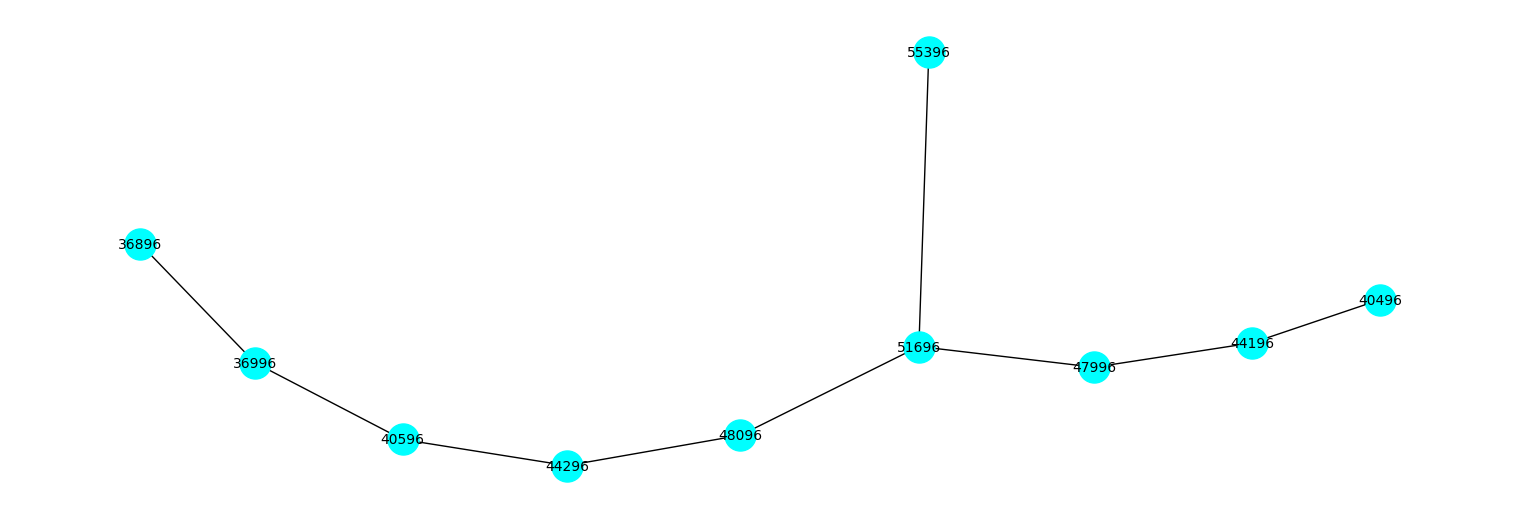

In [177]:
display_a_to_b_nodes(Spatial_temporal_graph, 0, 10, "row_index")

## **Create temporal edges - between years of the same Month**


In [178]:
list_of_months = ["01","02","03","04","05","06","07","08","09","10","11","12"]
list_of_years=["2015","2016","2017","2018","2019","2020","2021","2022","2023"]
diffy=0.05
for m, month in enumerate(list_of_months):
    for y, year in enumerate(list_of_years[:-1]):
    # Get the dataset for the current year of the month and the next year
      currentYearMonth = float(year+month)
      dataset_subset_1 = sort_processed_dataset[sort_processed_dataset["Month"] == currentYearMonth]
      for yy in range(y + 1, 9):
        print(yy, " year ", list_of_years[yy])
        nextYearMonth = float(list_of_years[yy]+month)
        dataset_subset_2 = sort_processed_dataset[sort_processed_dataset["Month"] == nextYearMonth]
        print("current year month ", currentYearMonth, " next year month ",nextYearMonth)


  	  # Create dictionaries for the coordinates
        coords_dict_1 = {(row["Lon"], row["Lat"]): idx for idx, row in dataset_subset_1.iterrows()}
        coords_dict_2 = {(row["Lon"], row["Lat"]): idx for idx, row in dataset_subset_2.iterrows()}


     # Iterate through the first dictionary and check if the coordinates exist in the second dictionary
        if coords_dict_1  is not None:
         for coord, idx1 in coords_dict_1.items():
           idx1_Spei=dataset_subset_1[dataset_subset_1["row_index"] == idx1].iloc[0]['spei01']
           idx1_Spei_a=dataset_subset_1[dataset_subset_1["row_index"] == idx1].iloc[0]['next_month_spei01']
           #print("idx1", idx1, " SPEI01 ", idx1_Spei);
           if coords_dict_2 is not None:
             idx2 = coords_dict_2.get(coord)
             if idx2 is not None:
                idx2_Spei=dataset_subset_2[dataset_subset_2["row_index"] == idx2].iloc[0]['spei01']
                idx2_Spei_a=dataset_subset_2[dataset_subset_2["row_index"] == idx2].iloc[0]['next_month_spei01']
                #print("idx2", idx2, " SPEI01 ", idx2_Spei);
                speiDiff= abs(idx1_Spei-idx2_Spei)
                speiDiff_a= abs(idx1_Spei_a-idx2_Spei_a)
                if (speiDiff < diffy) and (speiDiff_a < diffy) :
                   Spatial_temporal_graph.add_edge(idx1, idx2)
                   print("add Temporal edges with node ", idx1 ," and next year Node ", idx2, " DIff ", speiDiff, " ", speiDiff_a)
                   print("")
      # Update and print the processed count
      total_index += len(dataset_subset_1)
      print("nodes processed: " + str(total_index))

Streaming output truncated to the last 5000 lines.
add Temporal edges with node  4630  and next year Node  4654  DIff  0.0070573999999999915   0.045473450000000026

add Temporal edges with node  9630  and next year Node  9654  DIff  0.0376069   0.006755100000000014

add Temporal edges with node  6330  and next year Node  6354  DIff  0.03621940000000001   0.044132599999999966

add Temporal edges with node  24628  and next year Node  24652  DIff  0.0070725600000000055   0.02198

5  year  2020
current year month  201711.0  next year month  202011.0
add Temporal edges with node  36926  and next year Node  36962  DIff  0.019741600000000026   0.03337400000000007

add Temporal edges with node  44226  and next year Node  44262  DIff  0.03166619999999998   0.0047479999999999745

add Temporal edges with node  37026  and next year Node  37062  DIff  0.03012349999999997   0.017309999999999992

add Temporal edges with node  51826  and next year Node  51862  DIff  0.033359099999999975   0.0305384299

In [179]:
def generate_nodes_degree_df(graph, df, attribute_name, degree, opt):
    # Extract nodes from index a to b
    nodes_subset = list()
    for  columnData  in df["row_index"]:
      row_index=columnData
     # node = graph.nodes[columnData]
      nodes_subset.append(row_index)
      #print('NODE : ', node )

    print("node subset", nodes_subset)
    # Create a subgraph with these nodes
    subgraph = graph.subgraph(nodes_subset)
    print('subgraph : ', subgraph )
    # Create a dictionary for node labels based on the specified attribute
    node_labels = {node: subgraph.nodes[node].get(attribute_name, '') for node in subgraph.nodes()}
    if (opt == 'gt'):
      node_lat = [subgraph.nodes[node].get("Lat", '') for node in subgraph.nodes() if subgraph.degree(node) > degree]
      node_lon = [subgraph.nodes[node].get("Lon", '') for node in subgraph.nodes() if subgraph.degree(node) > degree]
    if (opt == 'eq'):
      node_lat = [subgraph.nodes[node].get("Lat", '') for node in subgraph.nodes() if subgraph.degree(node) == degree]
      node_lon = [subgraph.nodes[node].get("Lon", '') for node in subgraph.nodes() if subgraph.degree(node) == degree]
    dict = {'lat': node_lat, 'lon': node_lon}

    df = pd.DataFrame(dict)
    return df

In [180]:
df0=generate_nodes_degree_df(Spatial_temporal_graph, dfym_row, "Month",0,"eq")

node subset [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900, 5000, 5100, 5200, 5300, 5400, 5500, 5600, 5700, 5800, 5900, 6000, 6100, 6200, 6300, 6400, 6500, 6600, 6700, 6800, 6900, 7000, 7100, 7200, 7300, 7400, 7500, 7600, 7700, 7800, 7900, 8000, 8100, 8200, 8300, 8400, 8500, 8600, 8700, 8800, 8900, 9000, 9100, 9200, 9300, 9400, 9500, 9600, 9700, 9800, 9900, 9999, 10099, 10199, 10299, 10399, 10499, 10599, 10699, 10799, 10899, 10999, 11099, 11199, 11299, 11399, 11499, 11599, 11699, 11799, 11899, 11999, 12099, 12199, 12299, 12399, 12499, 12599, 12699, 12799, 12899, 12999, 13099, 13199, 13299, 13399, 13499, 13599, 13699, 13799, 13899, 13999, 14099, 14199, 14299, 14399, 14499, 14599, 14699, 14799, 14899, 14999, 15099, 15199, 15299, 15399, 15499, 15599, 1

In [181]:

# Initialize an empty list to hold the dataframes
df_list = []

# Loop to generate 10 dataframes
for i in range(20):
    df = generate_nodes_degree_df(Spatial_temporal_graph, dfym_row, "Month", i, "eq")
    if not df.empty:
        df_list.append(df)
        print("added ", i)

# df_list now contains 10 dataframes with the required specifications


node subset [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900, 5000, 5100, 5200, 5300, 5400, 5500, 5600, 5700, 5800, 5900, 6000, 6100, 6200, 6300, 6400, 6500, 6600, 6700, 6800, 6900, 7000, 7100, 7200, 7300, 7400, 7500, 7600, 7700, 7800, 7900, 8000, 8100, 8200, 8300, 8400, 8500, 8600, 8700, 8800, 8900, 9000, 9100, 9200, 9300, 9400, 9500, 9600, 9700, 9800, 9900, 9999, 10099, 10199, 10299, 10399, 10499, 10599, 10699, 10799, 10899, 10999, 11099, 11199, 11299, 11399, 11499, 11599, 11699, 11799, 11899, 11999, 12099, 12199, 12299, 12399, 12499, 12599, 12699, 12799, 12899, 12999, 13099, 13199, 13299, 13399, 13499, 13599, 13699, 13799, 13899, 13999, 14099, 14199, 14299, 14399, 14499, 14599, 14699, 14799, 14899, 14999, 15099, 15199, 15299, 15399, 15499, 15599, 1

<ipython-input-182-5970e76f8c97>:20: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


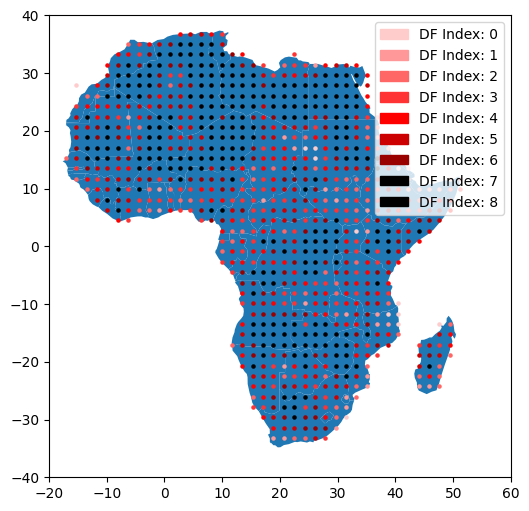

In [182]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Assuming df_list is your list of dataframes
# df_list = [df0, df1, df2, df3, df4, df5, df6, dfh]

# Create a list to store the GeoDataFrames
gdf_list = []

# Generate GeoDataFrames from each dataframe in df_list
for df in df_list:
    geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]
    gdf = GeoDataFrame(df, geometry=geometry)
    gdf_list.append(gdf)

# Load world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter for only African countries
africa = world[world['continent'] == 'Africa']

# Create a single plot
fig, ax = plt.subplots(figsize=(10, 6))
africa.plot(ax=ax)

# Shades of red, from light to dark
red_shades = ['#ffcccc', '#ff9999', '#ff6666', '#ff3333', '#ff0000', '#cc0000', '#990000']

# Plot each GeoDataFrame on the same axis, focusing on Africa
for i, gdf in enumerate(gdf_list):
    color = red_shades[i] if i < len(red_shades) else 'black'  # Use black for indexes out of red_shades range
    gdf.plot(ax=ax, marker='o', color=color, markersize=5)

# Create legend patches
legend_patches = [mpatches.Patch(color=red_shades[i] if i < len(red_shades) else 'black', label=f'DF Index: {i}') for i in range(len(gdf_list))]

# Add legend to the plot
plt.legend(handles=legend_patches, loc='upper right')

# Adjust the plot to focus on Africa
ax.set_xlim([-20, 60])  # Longitude bounds for Africa
ax.set_ylim([-40, 40])  # Latitude bounds for Africa

# Show the plot
plt.show()


In [183]:
list(Spatial_temporal_graph.edges())[0:3000]

[(36896, 36996),
 (36896, 36908),
 (36896, 36920),
 (36896, 36956),
 (36896, 36980),
 (40496, 44196),
 (44196, 47996),
 (47996, 51696),
 (51696, 48096),
 (51696, 55496),
 (51696, 55396),
 (51696, 51796),
 (55396, 55496),
 (55396, 51796),
 (36996, 37096),
 (36996, 33396),
 (36996, 40596),
 (36996, 37020),
 (40596, 37096),
 (40596, 44296),
 (40596, 40696),
 (40596, 44396),
 (44296, 48096),
 (44296, 40696),
 (44296, 48196),
 (44296, 44396),
 (48096, 48196),
 (48096, 44396),
 (48096, 51796),
 (48096, 51896),
 (51796, 55496),
 (51796, 51896),
 (51796, 55596),
 (55496, 59096),
 (55496, 51896),
 (55496, 55596),
 (59096, 59144),
 (33396, 29996),
 (33396, 37096),
 (33396, 33496),
 (37096, 33496),
 (37096, 37196),
 (40696, 37196),
 (40696, 44396),
 (40696, 44496),
 (40696, 40796),
 (44396, 48196),
 (44396, 44496),
 (44396, 40796),
 (48196, 44496),
 (48196, 51896),
 (48196, 51996),
 (51896, 55596),
 (51896, 51996),
 (55596, 51996),
 (59196, 55696),
 (59196, 59296),
 (62696, 62744),
 (29996, 33496

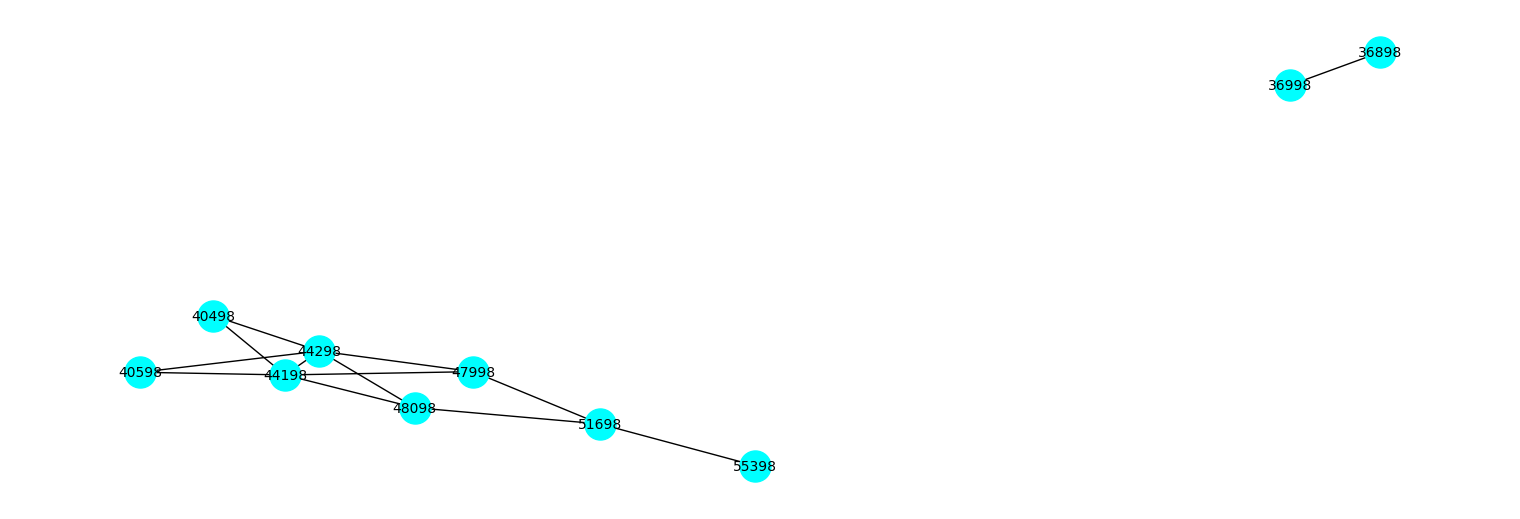

In [184]:
display_a_to_b_nodes(Spatial_temporal_graph, 1672, 1682, "row_index")

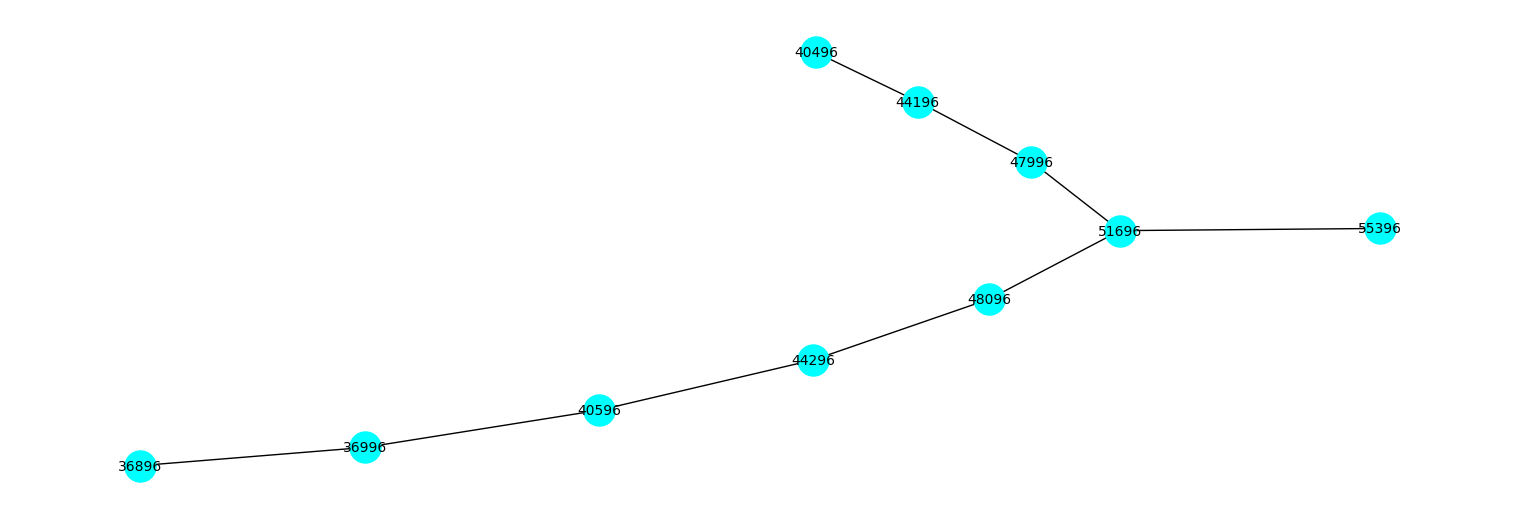

In [185]:
display_a_to_b_nodes(Spatial_temporal_graph, 0, 10, "row_index")

**Save Graph**

In [186]:
import pickle

# save graph object to file
pickle.dump(Spatial_temporal_graph, open('/content/drive/MyDrive/DroughtCastAI/Dataset/Spatial_temporal_grpah_version_2_normalized_1month_selectedY1.pickle', 'wb'))


In [188]:

# load graph object from file
Graph = pickle.load(open('/content/drive/MyDrive/DroughtCastAI/Dataset/Spatial_temporal_grpah_version_2_normalized_1month_selectedY1.pickle', 'rb'))

**Graph Display and Test**

In [192]:
import pickle
import networkx as nx

# Load the graph
with open('/content/drive/MyDrive/DroughtCastAI/Dataset/Spatial_temporal_grpah_version_2_normalized_1month_selectedY1.pickle', 'rb') as file:
    Graph = pickle.load(file)

# Initialize counters
total_degree = 0

# Calculate the total degree
for _, degree in Graph.degree():
    total_degree += degree

# Print summary information about the graph
print("Number of nodes:", Graph.number_of_nodes())
print("Number of edges:", Graph.number_of_edges())
print("Average degree:", total_degree / Graph.number_of_nodes())

# For directed graphs, additional calculations can be added here

# Check if the graph is connected (for undirected graphs)
if nx.is_connected(Graph):
    print("The graph is connected")
else:
    print("The graph is not connected")
    print("Number of connected components:", nx.number_connected_components(Graph))

print("Graph density:", nx.density(Graph))

# Initialize a dictionary to count nodes for each degree (0 to 6)
degree_counts = {i: 0 for i in range(7)}

# Iterate through all nodes and their degrees
for _, degree in Graph.degree():
    if degree < 7:
        degree_counts[degree] += 1

# Print the number of nodes for each degree from 0 to 6
print("\nNumber of nodes with each degree from 0 to 6:")
for degree in range(7):
    print(f"Degree {degree}: {degree_counts[degree]}")


Number of nodes: 83580
Number of edges: 259410
Average degree: 6.207465900933237
The graph is not connected
Number of connected components: 1415
Graph density: 7.427064096164393e-05

Number of nodes with each degree from 0 to 6:
Degree 0: 965
Degree 1: 2546
Degree 2: 4302
Degree 3: 6392
Degree 4: 8257
Degree 5: 10147
Degree 6: 10920


In [194]:
import networkx as nx
import pickle

# Load your graph
with open('/content/drive/MyDrive/DroughtCastAI/Dataset/Spatial_temporal_grpah_version_2_normalized_1month_selectedY1.pickle', 'rb') as file:
    Graph = pickle.load(file)

# Initialize a dictionary to count nodes for each degree (0 to 14)
degree_counts = {i: 0 for i in range(15)}

# Initialize total degree counter
total_degree = 0

# Iterate through all nodes and their degrees
for _, degree in Graph.degree():
    total_degree += degree
    if degree < 15:
        degree_counts[degree] += 1

# Print summary
print("Number of nodes:", Graph.number_of_nodes())
print("Number of edges:", Graph.number_of_edges())

# Print the number of nodes for each degree from 0 to 14
print("Number of nodes with each degree from 0 to 14:")
for degree in range(15):
    print(f"Degree {degree}: {degree_counts[degree]}")

print("Average degree:", total_degree / Graph.number_of_nodes())
print("Graph density:", nx.density(Graph))


Number of nodes: 83580
Number of edges: 259410
Number of nodes with each degree from 0 to 14:
Degree 0: 965
Degree 1: 2546
Degree 2: 4302
Degree 3: 6392
Degree 4: 8257
Degree 5: 10147
Degree 6: 10920
Degree 7: 10703
Degree 8: 12454
Degree 9: 9179
Degree 10: 4640
Degree 11: 1869
Degree 12: 788
Degree 13: 287
Degree 14: 85
Average degree: 6.207465900933237
Graph density: 7.427064096164393e-05


KeyboardInterrupt: 

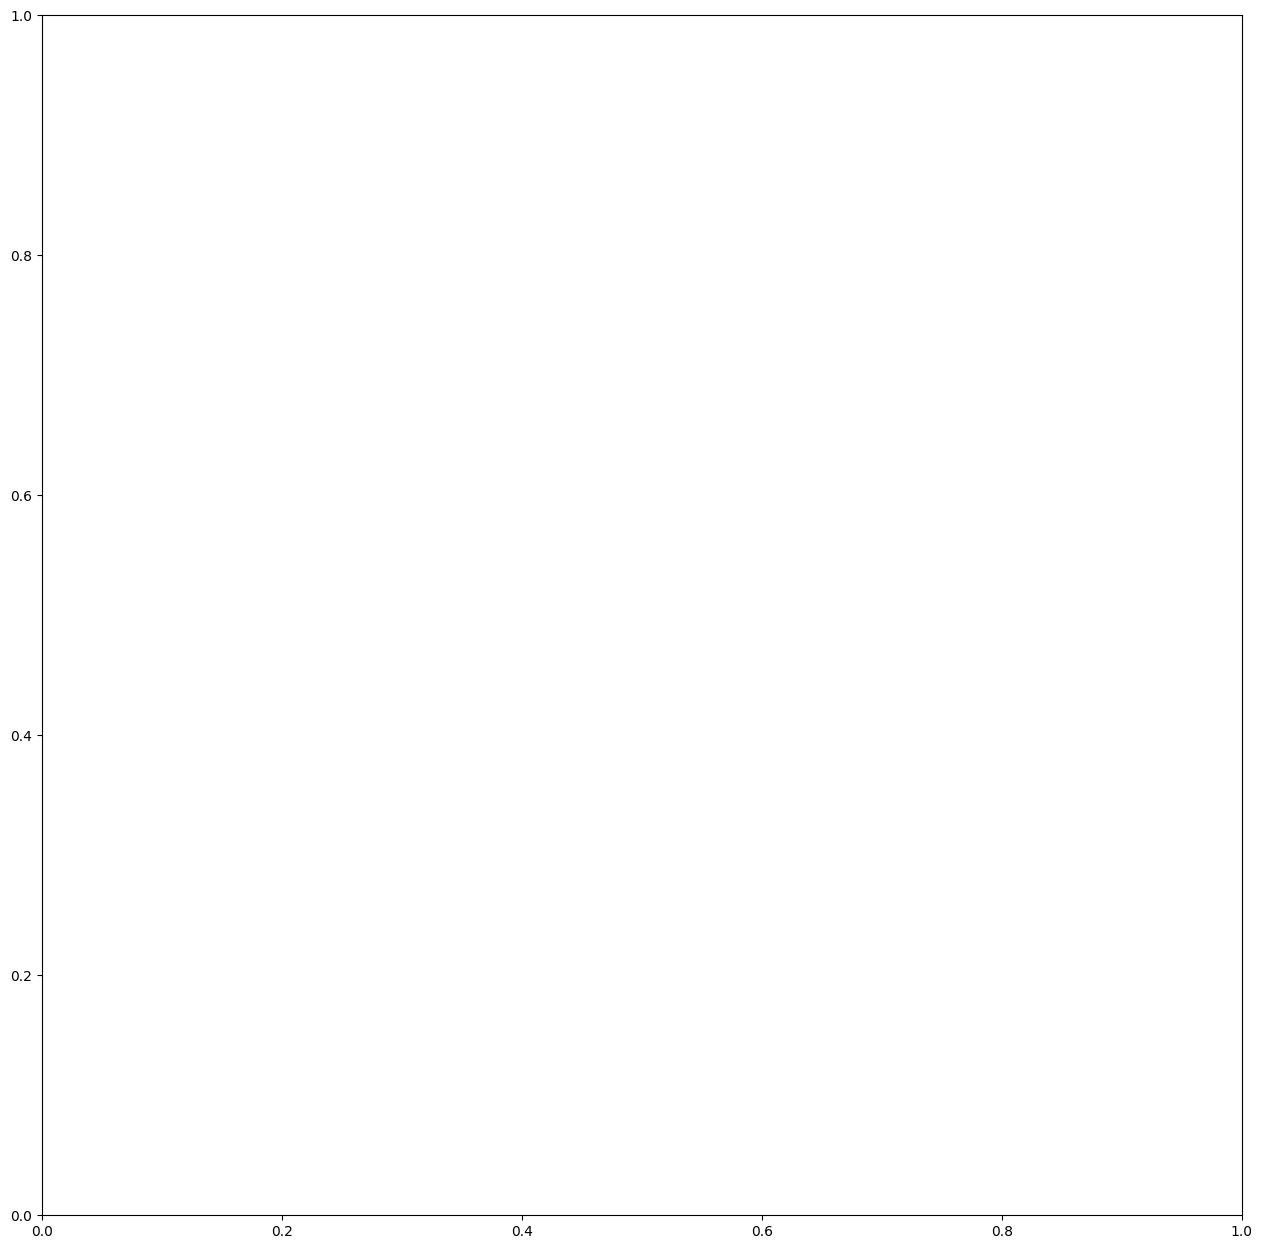

In [195]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import pickle

# Load your large graph
with open('/content/drive/MyDrive/DroughtCastAI/Dataset/Spatial_temporal_grpah_version_2_normalized_1month_selectedY1.pickle', 'rb') as file:
    Graph = pickle.load(file)

# Select a random sample of nodes
sample_size = 1000  # Adjust this number based on your needs and system capabilities
sampled_nodes = random.sample(list(Graph.nodes()), sample_size)

# Create a subgraph with the sampled nodes and their immediate neighbors
subgraph_nodes = set(sampled_nodes)
for node in sampled_nodes:
    subgraph_nodes.update(Graph.neighbors(node))
subgraph = Graph.subgraph(subgraph_nodes)

# Draw the subgraph
plt.figure(figsize=(12, 12))
nx.draw(subgraph, with_labels=False, node_size=20, edge_color='gray')
plt.title("Sampled Subgraph Visualization")
plt.show()


In [196]:
def display_a_to_b_nodes(graph, a, b, attribute_name):
    # Extract nodes from index a to b
    nodes_subset = list(graph.nodes())[a:b]

    # Create a subgraph with these nodes
    subgraph = graph.subgraph(nodes_subset)

    # Create a dictionary for node labels based on the specified attribute
    node_labels = {node: subgraph.nodes[node].get(attribute_name, '') for node in subgraph.nodes()}

    # Draw the subgraph with the linear layout
    plt.figure(figsize=(15, 5))
    nx.draw(subgraph, with_labels=True, node_color="cyan", node_size=500, edge_color='black', linewidths=1, font_size=10, labels=node_labels)
    plt.show()

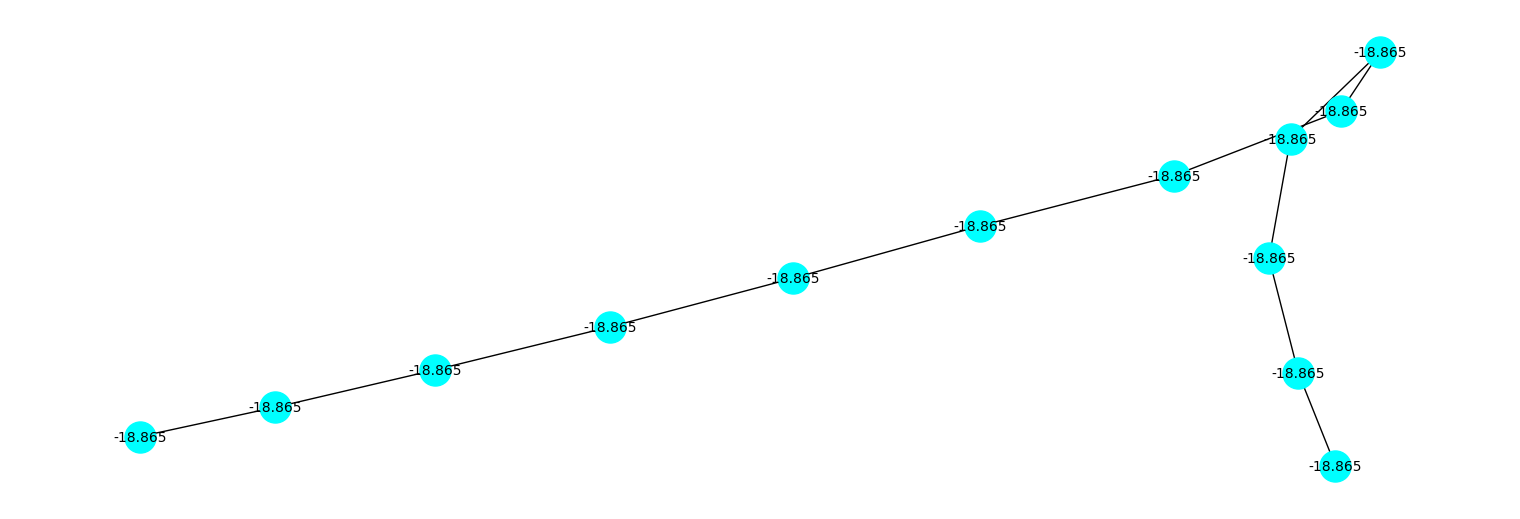

In [197]:
display_a_to_b_nodes(Spatial_temporal_graph, 90, 103, "Lat")

In [198]:
#Access node attibutes for the 80th node
Spatial_temporal_graph.nodes[list(Spatial_temporal_graph.nodes())[80]]

{'row_index': 52396,
 'Month': 201505,
 'Lat': -20.661,
 'Lon': 26.051,
 'Lat_nom': 0.1794944982802665,
 'Lon_nom': 0.6315766346379188,
 'temperature_2m': 0.5362895447530871,
 'temperature_2m_min': 0.6666134695180341,
 'temperature_2m_max': 0.4709635931935096,
 'dewpoint_temperature_2m': 0.6398065665563752,
 'total_precipitation_sum': 4.197888979301165e-05,
 'total_precipitation_min': 0.0,
 'total_precipitation_max': 0.0001239348777246,
 'u_component_of_wind_10m': 0.3156139509781005,
 'v_component_of_wind_10m': 0.4649815711718297,
 'surface_net_solar_radiation_sum': 0.5658021482706602,
 'total_evaporation_sum': 0.6078474348178262,
 'soil_moisture_am': 0.1251060285930198,
 'soil_moisture_pm': 0.1347255041185762,
 'NDVI': 0.4128594883103823,
 'EVI': 0.3085730909622223,
 'next_month_tempreature': 0.3147141985917843,
 'next_month_precipitation': 0.0088728425501937,
 'year': 0.0,
 'month2': 0.3636363636363636,
 'spei01': 0.2454369999999999,
 'next_month_soil_moisture_am': 0.1093923597723662